# Data Wrangling
### Welcome to the VectorBiTE 2021 section on Data Wrangling
This section will cover:
* Data Management and Visualization
* Experimental Design

# Data Management and Visualization

> *Clutter and confusion are failures of design, not attributes of information.* &ndash; Edward Tuftey

## Introduction

This section aims at introducing you to key principles and methods for data processing, storage, exploration and visualization. 

In this modern world, massive amounts of data are being generated in biology due to rapid advances in technologies for collecting new, as well as for digitizing old data. Some prominent examples are *Genomic*, *Ecosystem respiration*, *Climatic*, and *Animal tracking* data. Ultimately, the goal of quantitative biology is to both, discover patterns in these data, and fit mathematical models to them. Reproducible data manipulation, analyses and visualization are particularly necessary when data are so large and complex, and few are more so than biological data, which are extremely heterogeneous in their structure and quality.  Furthermore, when these data are "big" (more below on what makes a dataset "big"), computationally-efficient data handling, manipulation and analysis techniques are needed. 

### R vs. Python

We will use R in VectorBiTE 2021 Training because it a great one stop solution for both data manipulation, analysis and visualization. In general, R will do the job for most of your purposes. There is not much between difference these two languages for data science. One advantage that Python has is its greater computational efficiency. On the other hand, R was developed for convenient statistical analyses, with efficiency not being the main concern. 

Read more about R vs Python for data science [here](https://www.guru99.com/r-vs-python.html#:~:text=R%20is%20mainly%20used%20for,of%20course%2C%20the%20ideal%20solution.&text=Python%20is%20a%20general%2Dpurpose%20language%20with%20a%20readable%20syntax.) and [here](https://www.datacamp.com/community/tutorials/r-or-python-for-data-analysis). 

## Data wrangling

You are likely to spend far more time than you think dredging through data files manually &ndash; checking them, editing them, and reformatting them to make them useful for data exploration and analysis. It is often the case that you'll have to deal with messy or incomplete data, either because of sampling challenges (e.g., "field" data), or because you got given data that was poorly recorded and maintained. The data we obtain from different data sources is often unusable at the beginning; for example you may need to:
* Identify the variables vs observations within the data&mdash;somebody else might have recorded the data, or you youself might have collected the data some time back!
* Fill in zeros (true measured or observed absences) 
* Identify and add a value (e.g., `-999999`) to denote missing observations	
* Derive or calculate new variables from the raw observations (e.g., convert measurements to SI units; kilograms, meters, seconds, etc.)
* Reshape/reformat your data into a layout that works best for analysis (e.g., for R itself);e.g., from wide to long data format for replicated (across plates, chambers, plots, sites, etc.) data
* Merge multiple datasets together into a single data sheet

This is not an exhaustive list. Doing so many different things to your raw data is both time-consuming and risky. Why risky? Because  to err is very human, and every new, tired mouse-click and/or keyboard-stab has a high probability of inducing an erroneous data point!




## Some data wrangling principles

So you would like a record of the data wrangling process (so that it  is repeatable and even reversible), and automate it to the extent  possible. To this end, here are some guidelines:

* Store data in universally (machine)-readable, non-proprietary formats; basically, use plain ASCII text for your file names, variable/field/column names, and data values. And make sure the data file's "text encoding" is correct and standard  (e.g., `UTF-8`). 

* Keep a metadata file for each unique dataset (again, in  non-proprietary format).

* Minimize modifying raw data by hand&mdash;use scripts  instead&mdash;keep a copy of the data as they were recorded.

* Use meaningful names for your data and files and field (column) names

* When you add data, try not to add columns (widening the format); rather, design your tables/data-sheets so that you add only rows (lengthening the format)&mdash;and convert "wide format data" to "long format data" using  scripts, not by hand,

* All cells within a data column should contain only one type of information (i.e., either text (character), numeric, etc.). 

* Ultimately, consider creating a relational database for your data (More on this below).

This is not an exhaustive list either&mdash; see the [Readings & Resources Section](#Readings-&-Resources).

### An example

We will use the Pound Hill dataset collected by students in a Silwood Field Course for understanding some of these  principles. This is not vectorbite data but it is an excellent example of a dataset that needs wrangling. VectorBiTE is too well strucutured for this sort of wrangling.

To start with, we need to import the *raw* data file, for which, follow these steps:

&#9733; Copy the file `PoundHillData.csv` and `PoundHillMetaData.csv` files from the VectorBiTE `data` directory into your own R  `data` directory. Then load the data in R: 

In [4]:
MyData <- as.matrix(read.csv("../data/PoundHillData.csv",header = FALSE))
class(MyData)

[1] "matrix"

* Loading the data `as.matrix()`, and setting `header=FALSE` guarantees that the data are imported "as is" so that you can wrangle them. Otherwise `read.csv` will convert the first row to column headers.
* All the data will be converted to the character class in the resulting matrix called `MyData` because at least one of the entries is already character class.

```{note}
As of R version 4.0.0 of R released in April 2020, the default for
`stringsAsFactors` [was changed to false](https://cran.r-project.org/doc/manuals/r-devel/NEWS.html) If you are using R version 3.x.x, you will need to add `stringsAsFactors = FALSE` to the above command to prevent R from converting all columns of character type (strings) to the `factor` data type (this will create problems with subsequent data wrangling).
```

&#9733; Now load the Metadata:

In [5]:
MyMetaData <- read.csv("../data/PoundHillMetaData.csv",header = TRUE,  sep=";")
class(MyMetaData)

[1] "data.frame"

* Here, `header =TRUE` because we do have metadata headers (`FieldName` and`Description`), and 
* We have used semicolon (`;`) as delimiter because there are commas in one of the field descriptions.
* We have avoided spaces in the columns headers (so "FieldName" instead of "Field Name") — please avoid spaces in field or column names because R will replace each space in a column header with a dot, which may be confusing.

```{tip}
**The text encoding of your data file:** If you have a string (`character` data type) stored as a variable in your R workspace, or a file containing strings, the computer has to know what [character  encoding](https://en.wikipedia.org/wiki/Character_encoding) it is in or it cannot interpret or display it to you correctly. Usually, the encoding will be UTF-8 or ASCII, which is easily handled by most computer languages. Sometimes you may run into (unexpected) bugs when importing and running scripts in `R` because your file has a non-standard text encoding. You will need to specify the encoding in that case, using the `encoding` argument of `read.csv()` and `read.table()`. You can check the encoding of a file by using `find` in Linux/Mac. Try in your UNIX terminal: 

`file -i ../data/PoundHillData.csv`

or, check encoding of all files in the `Data` directory: 

`file -i ../data/*.csv` 

Use `file -I` instead of `file -i` in a Mac terminal.
```

Now check out what the data look like:

In [6]:
head(MyData)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
Cultivation,october,october,october,october,october,may,may,may,may,⋯,march,march,may,may,may,october,october,october,october,october
Block,a,a,a,a,a,a,a,a,a,⋯,d,d,d,d,d,d,d,d,d,d
Plot,1,1,1,1,1,2,2,2,2,⋯,10,10,12,12,12,11,11,11,11,11
Quadrat,Q1,Q2,Q3,Q4,Q5,Q1,Q2,Q3,Q4,⋯,Q5,Q6,Q1,Q2,Q4,Q1,Q2,Q3,Q4,Q5
Achillea millefolium,4,8,3,20,6,4,,,,⋯,4,10,,,,,,12,6,5
Agrostis gigantea,,,,,15,,,,,⋯,19,80,33,145,45,62,25,57,113,12


Note that column names V1-V60 were generated automatically by R when you imported the data

In RStudio you can also do `view(MyData)` at the R prompt or any other code editor, `fix(MyData)`. We won't do anything with the metadata file in this session except inspect the information it contains. 


### Keep a metadata file for each unique dataset

Data wrangling really begins immediately after data collection. You may collect data of different kinds (e.g., diversity, biomass, tree girth), etc. Keep the original spreadsheet well documented using a "metadata" file that describes the data (you would hopefully have written the first version of this even before you started collecting the data!). The minimum information needed to make a metadata file useful is a description of each of the *fields* — the column or row headers under which the information is stored in your data/spreadsheet.

Have a look at the metadata file for the Pound Hill dataset:


**Boolean arguments in R**: In `R`, you can use `F` and `T` for boolean `FALSE` and `TRUE` respectively. To see this, type `a <- T`

in the R commandline, and then see what R returns when you type `a`. Using `F` and `T` for boolean `FALSE` and `TRUE` respectively is not necessarily good practice, but be aware that this option exists. 
```

In [7]:
MyMetaData

FieldName,Description
<fct>,<fct>
Cultivation,"Cultivation treatments applied in three months: october, may, march"
Block,Treatment blocks ids: a-d
Plot,Plot ids under each treatment : 1-12
Quadrat,Sampling quadrats (25x50 cm each) per plot: Q1--Q6
SpeciesCount,Number of individuals of species (count) per quadrat


Ideally, you would also like to add more information about the data, such as the measurement units of each type of observation. These data include just one type of observation: Number of individuals of species per sample (plot), which is a count (integer, or `int` data class).

### Minimize modifying raw data by hand

When the dataset is large (e.g., 1000's of rows), cleaning and exploring it can get tricky, and you are very likely to make many mistakes. You should record all the steps you used to process it with an R script rather than risking a manual and basically *irreproducible* processing. Most importantly, *avoid or minimize editing your raw data
file*&mdash;make a copy (with a meaningful tag in the file name to indicate the date and author) before making hand edits.

All blank cells in the data are *true absences*, in the sense that species was actually not present in that quadrat. So we can replace those blanks with zeros:  

In [8]:
MyData[MyData == ""] = 0

### Convert wide format data to long format using scripts

One typically records data in the field or experiments using a "wide" format, where a subject's (e.g., habitat, plot, treatment, species etc) repeated responses or observations (e.g., species count, biomass, etc) will be in a single row, and each response in a separate column. The raw Pound Hill data were recorded in this way. However, the wide format is not ideal for data analysis — instead you need the data in a "long" format, where each row is one observation point per subject. So each subject will have data in multiple rows. Any measures/variables/observations that don't change across the subjects will have the same value in all the rows. For humans, the wide format is generally more intuitive for recording (e.g., in field data sheets) data. However, for data inspection and analysis, the long format is preferable for two main reasons: 

* If you have many response and/or treatment variables, it is hard to inspect the data values in a wide-form version of the dataset. In the case of the pound hill dataset, the response variable is species, and treatment variable is cultivation month (with sequentially nested replicates&mdash;block, plot, quadrat&mdash; within it), and the data values are the number (count) of individuals of each species per quadrat. As you can see, there are a a large number of columns (60 to be exact), with columns V2-V60 containing different treatment combinations. This makes it hard to visually see problems with the data values. You would have to look across all these columns to see any issues, or if you wanted to run a single command on all the data values (e.g., `is.integer()` to check if they are all integers, as you would expect), it would be harder to do so or interpret the output if all the species counts were in a single column.

* Long-form datasets are typically required for statistical analysis and visualization packages or commands in R (or Python, for that matter). For example, if you wanted to fit a linear model using R's `lm()` command, with treatment (cultivation month) as the independent variable, you would need to structure your data in long form. Similarly, and if you wanted to plot histograms of species numbers by treatment using ggplot (coming up), you would also need these data in long format.

*OK, so let's go from wide to long format already!*

You can switch between wide and long formats using `melt()` and `dcast()` from the `reshape2` package, as illustrated in the script `DataWrang.R` available at [TheMulQuaBio repository](https://github.com/mhasoba/TheMulQuaBio/tree/master/content/code). But first, let's transpose the data, because for a long format, the (nested) treatments variables should be in rows:

In [9]:
MyData <- t(MyData) 
head(MyData)

V1,Cultivation,Block,Plot,Quadrat,Achillea millefolium,Agrostis gigantea,Anagallis arvensis,Anchusa arvensis,Anisantha sterilis,Aphanes australis,⋯,Semecio jacobaea,Sonchus asper,Spergula arvensis,Stellaria graminea,Taraxacum officinale,Tripleurospermum inodorum,Veronica arvensis,Veronica persica,Viola arvensis,Vulpia myuros
V2,october,a,1,Q1,4,0,0,0,0,0,⋯,0,0,0,8,0,11,0,1,0,0
V3,october,a,1,Q2,8,0,0,3,0,0,⋯,0,0,0,4,0,1,0,0,3,0
V4,october,a,1,Q3,3,0,0,1,0,0,⋯,0,0,0,1,0,0,0,0,1,0
V5,october,a,1,Q4,20,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,1,0
V6,october,a,1,Q5,6,15,0,0,5,0,⋯,0,0,0,1,10,0,0,0,0,7


At this point, you should note that the first row in the data `matrix` actually contains the column headers, but these are not encoded by R as being column headers. As far as R is concerned, the first row is just another data row. You can check this:

In [10]:
colnames(MyData)

NULL

We need to fix this. Also, we would like to create a dataframe now, as this is needed by the R commands we will be using, and ultimately, any visualization and analysis we will be doing. To this end, let's first create a temporary dataframe with just the data, without the column names:

In [11]:
TempData <- as.data.frame(MyData[-1,],stringsAsFactors = F)
head(TempData)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
V2,october,a,1,Q1,4,0,0,0,0,0,⋯,0,0,0,8,0,11,0,1,0,0
V3,october,a,1,Q2,8,0,0,3,0,0,⋯,0,0,0,4,0,1,0,0,3,0
V4,october,a,1,Q3,3,0,0,1,0,0,⋯,0,0,0,1,0,0,0,0,1,0
V5,october,a,1,Q4,20,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,1,0
V6,october,a,1,Q5,6,15,0,0,5,0,⋯,0,0,0,1,10,0,0,0,0,7
V7,may,a,2,Q1,4,0,0,1,0,0,⋯,0,0,2,0,0,0,0,2,0,0


Note that `stringsAsFactors = F` is important here because we don't want R to convert columns to the factor class without supervision. This might be a good idea in may cases, but let's just do it manually later. This will also force you to think carefully about what data each of you columns contains. 

Now let's assign the original column names to the temporary dataset: 

In [12]:
colnames(TempData) <- MyData[1,] # assign column names from original data
head(TempData)

,Cultivation,Block,Plot,Quadrat,Achillea millefolium,Agrostis gigantea,Anagallis arvensis,Anchusa arvensis,Anisantha sterilis,Aphanes australis,⋯,Semecio jacobaea,Sonchus asper,Spergula arvensis,Stellaria graminea,Taraxacum officinale,Tripleurospermum inodorum,Veronica arvensis,Veronica persica,Viola arvensis,Vulpia myuros
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
V2,october,a,1,Q1,4,0,0,0,0,0,⋯,0,0,0,8,0,11,0,1,0,0
V3,october,a,1,Q2,8,0,0,3,0,0,⋯,0,0,0,4,0,1,0,0,3,0
V4,october,a,1,Q3,3,0,0,1,0,0,⋯,0,0,0,1,0,0,0,0,1,0
V5,october,a,1,Q4,20,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,1,0
V6,october,a,1,Q5,6,15,0,0,5,0,⋯,0,0,0,1,10,0,0,0,0,7
V7,may,a,2,Q1,4,0,0,1,0,0,⋯,0,0,2,0,0,0,0,2,0,0


The row names still remain, but they are not really bothering us, so we can ignore them. But if you do want to get rid of them, you can:

In [13]:
rownames(TempData) <- NULL
head(TempData)

,Cultivation,Block,Plot,Quadrat,Achillea millefolium,Agrostis gigantea,Anagallis arvensis,Anchusa arvensis,Anisantha sterilis,Aphanes australis,⋯,Semecio jacobaea,Sonchus asper,Spergula arvensis,Stellaria graminea,Taraxacum officinale,Tripleurospermum inodorum,Veronica arvensis,Veronica persica,Viola arvensis,Vulpia myuros
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,october,a,1,Q1,4,0,0,0,0,0,⋯,0,0,0,8,0,11,0,1,0,0
2,october,a,1,Q2,8,0,0,3,0,0,⋯,0,0,0,4,0,1,0,0,3,0
3,october,a,1,Q3,3,0,0,1,0,0,⋯,0,0,0,1,0,0,0,0,1,0
4,october,a,1,Q4,20,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,1,0
5,october,a,1,Q5,6,15,0,0,5,0,⋯,0,0,0,1,10,0,0,0,0,7
6,may,a,2,Q1,4,0,0,1,0,0,⋯,0,0,2,0,0,0,0,2,0,0


Finally, let's convert the data to long format. For this, we need the `reshape2` package:

```{note}
Both `library()` and `require()` are commands/functions to load packages. The difference is that `require()` is designed for use inside other functions, so it returns `FALSE` and gives a warning, whereas`library()` returns an error by default if the package does not exist.
```

In [14]:
require(reshape2)# load the reshape2 package

Loading required package: reshape2



Check out the help for the `melt` command of `reshape2`: `?melt`. 

OK finally, let's wrangle this dataset into submission!

In [15]:
MyWrangledData <- melt(TempData, id=c("Cultivation", "Block", "Plot", "Quadrat"), variable.name = "Species", value.name = "Count")
head(MyWrangledData); tail(MyWrangledData)

,Cultivation,Block,Plot,Quadrat,Species,Count
,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>
1,october,a,1,Q1,Achillea millefolium,4
2,october,a,1,Q2,Achillea millefolium,8
3,october,a,1,Q3,Achillea millefolium,3
4,october,a,1,Q4,Achillea millefolium,20
5,october,a,1,Q5,Achillea millefolium,6
6,may,a,2,Q1,Achillea millefolium,4


,Cultivation,Block,Plot,Quadrat,Species,Count
,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>
2414,may,d,12,Q4,Vulpia myuros,0
2415,october,d,11,Q1,Vulpia myuros,0
2416,october,d,11,Q2,Vulpia myuros,0
2417,october,d,11,Q3,Vulpia myuros,0
2418,october,d,11,Q4,Vulpia myuros,0
2419,october,d,11,Q5,Vulpia myuros,0


This is the long format we have been extolling! It looks much simpler, with all the count data in a single, long column with each count value associated with some "attributes". It is now clear that the fundamental unit of analysis is a species' count in a quadrat, each nested within a plot, each in turn nested within a block, and finally, each of which is nested within a cultivation month (the main treatment). 

We can also now assign the correct data types to each column:  

In [16]:
MyWrangledData[, "Cultivation"] <- as.factor(MyWrangledData[, "Cultivation"])
MyWrangledData[, "Block"] <- as.factor(MyWrangledData[, "Block"])
MyWrangledData[, "Plot"] <- as.factor(MyWrangledData[, "Plot"])
MyWrangledData[, "Quadrat"] <- as.factor(MyWrangledData[, "Quadrat"])
MyWrangledData[, "Count"] <- as.integer(MyWrangledData[, "Count"])
str(MyWrangledData)

'data.frame':	2419 obs. of  6 variables:
 $ Cultivation: Factor w/ 3 levels "march","may",..: 3 3 3 3 3 2 2 2 2 2 ...
 $ Block      : Factor w/ 4 levels "a","b","c","d": 1 1 1 1 1 1 1 1 1 1 ...
 $ Plot       : Factor w/ 12 levels "1","10","11",..: 1 1 1 1 1 5 5 5 5 5 ...
 $ Quadrat    : Factor w/ 6 levels "Q1","Q2","Q3",..: 1 2 3 4 5 1 2 3 4 5 ...
 $ Species    : Factor w/ 41 levels "Achillea millefolium",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Count      : int  4 8 3 20 6 4 0 0 0 0 ...


## On to data exploration

Once you have wrangled the Pound Hill data to its long format, you are ready to go! You may want to start by examining and visualizing the basic properties of the data, such as the number of tree species (41) in the dataset, number of quadrats (replicates) per plot and cultivation treatment, etc.

We will learn about visualization next. After that, you can return to this dataset and try out some visual data exploration. For example, a useful visualization would be to make a histogram of abundances of species, grouped by different factors. For example, you can look at distributions of species' abundances grouped by the fundamental treatment, `Cultivation`. 

### And then came `tidyverse`

So if you think this is the end of the options you have for data wrangling in R, think again. There is a whole data science "ecosystem" you can use in R through the `tidyverse` package.  This meta-package includes `dplyr`, the next iteration of `plyr` that addresses the speed issues in the latter, and `tidyr`, essentially a nicer wrapper to the ` reshape2` package with additional functions, and `ggplot2` (coming up later).

Please install and load the `tidyverse` package.

In [17]:
require(tidyverse)

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



This loads a number of packages at one go (and you might get some name-conflict-masking messages; see the note below). You can list these packages: 

In [18]:
tidyverse_packages(include_self = TRUE) # the include_self = TRUE means list "tidyverse" as well 

[1] "broom"         "cli"           "crayon"        "dbplyr"       
 [5] "dplyr"         "dtplyr"        "forcats"       "googledrive"  
 [9] "googlesheets4" "ggplot2"       "haven"         "hms"          
[13] "httr"          "jsonlite"      "lubridate"     "magrittr"     
[17] "modelr"        "pillar"        "purrr"         "readr"        
[21] "readxl"        "reprex"        "rlang"         "rstudioapi"   
[25] "rvest"         "stringr"       "tibble"        "tidyr"        
[29] "xml2"          "tidyverse"

That's a lot of packages!

The first time you load tidyverse, you will get some feedback from R, including something like the following:
```
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
```
Depending on which package you are loading, you might get such a warning message, that "so and so" function is being "masked" from another one. Basically, any additional packages you load may have one or more functions with the same names(s) as existing function(s) (which will typically do something completely different) in base R's packages. This creates name conflicts. Therefore, R will prevent you from using the new function(s) that you have enabled by using the same name of an pre-existing function. It gives priority to the pre-existing one. So, for example, if you call just `filter()`, the command that will be used is the one from `stats`, and not the one from `dplyr`. In this scenario, you can use the new function by using the double colon notation `::` like so: `dplyr::filter()`. 

```{tip}
The `::` notation is like the dot notation in Python — it allows you to access a particular function (like a Python module) from a package. So you can also use the command at the end of the `::` (try just `as_tibble(MyWrangledData)`, for example), but it's just safer to use the `::` because then you can rest assured that you are actually using the function you intended to.
```

More of `::` usage coming up below!

OK, let's try data exploration in tidyverse.

First, let's convert the dataframe to a "tibble":

In [19]:
tibble::as_tibble(MyWrangledData) 

Cultivation,Block,Plot,Quadrat,Species,Count
<fct>,<fct>,<fct>,<fct>,<fct>,<int>
october,a,1,Q1,Achillea millefolium,4
october,a,1,Q2,Achillea millefolium,8
october,a,1,Q3,Achillea millefolium,3
october,a,1,Q4,Achillea millefolium,20
october,a,1,Q5,Achillea millefolium,6
may,a,2,Q1,Achillea millefolium,4
may,a,2,Q2,Achillea millefolium,0
may,a,2,Q3,Achillea millefolium,0
may,a,2,Q4,Achillea millefolium,0


OK, there's the funky double colon (`::`) notation again...  

Also, note that we didn't have to reassign `MyWrangledData` back to its original name because tibble just does the needful to the data frame in its current place.

```{note}
A "tibble" in tidyverse is equivalent to R's traditional `data.frame`. Tibbles *are* modified data frames, but they make data exploration even easier.
```

In [20]:
dplyr::glimpse(MyWrangledData) #like str(), but nicer!

Rows: 2,419
Columns: 6
$ Cultivation <fct> october, october, october, october, october, may, may, may…
$ Block       <fct> a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, b, b, b, b…
$ Plot        <fct> 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4…
$ Quadrat     <fct> Q1, Q2, Q3, Q4, Q5, Q1, Q2, Q3, Q4, Q5, Q1, Q2, Q3, Q4, Q5…
$ Species     <fct> Achillea millefolium, Achillea millefolium, Achillea mille…
$ Count       <int> 4, 8, 3, 20, 6, 4, 0, 0, 0, 0, 1, 2, 5, 12, 2, 0, 0, 0, 0,…


Or this:

`utils::View(MyWrangledData) #same as fix()`

In [21]:
dplyr::filter(MyWrangledData, Count>100) #like subset(), but nicer!

Cultivation,Block,Plot,Quadrat,Species,Count
<fct>,<fct>,<fct>,<fct>,<fct>,<int>
october,b,6,Q1,Agrostis gigantea,143
october,c,8,Q1,Agrostis gigantea,198
october,c,8,Q5,Agrostis gigantea,351
march,d,10,Q1,Agrostis gigantea,259
march,d,10,Q4,Agrostis gigantea,291
may,d,12,Q2,Agrostis gigantea,145
october,d,11,Q4,Agrostis gigantea,113
may,c,9,Q2,Anisantha sterilis,120
october,a,1,Q1,Holcus mollis,159


In [22]:
dplyr::slice(MyWrangledData, 10:15) # Look at an arbitrary set of data rows

Cultivation,Block,Plot,Quadrat,Species,Count
<fct>,<fct>,<fct>,<fct>,<fct>,<int>
may,a,2,Q5,Achillea millefolium,0
march,a,3,Q1,Achillea millefolium,1
march,a,3,Q2,Achillea millefolium,2
march,a,3,Q3,Achillea millefolium,5
march,a,3,Q4,Achillea millefolium,12
march,a,3,Q5,Achillea millefolium,2


Learning to use `tidyverse` involves learning some new syntax and a lot of new commands, but if you plan to do a lot of data wrangling and exploration, you will benefit from getting to know them well. 

Have a look at some tidyverse-related [cheatsheets](https://rstudio.com/resources/cheatsheets/) to explore further. 

One additional thing that you would need to get used to in the `tidyverse` is piping multiple commands using the `%%` notation, which makes your code ore compact, and in theory, more readable.

## Handling Big Data in R

The buzzword 'Big Data' basically refers to datasets that have the following properties:

1.  A dataset that does not fit into available RAM on one system (say, 2 gigabytes).

2.  A dataset that has so many rows (when in it's long format — see above sections) that it *significantly* slows down your analysis or simulation without vectorization (that is, when looping).

Both these criteria are programming language-, and computer hardware-dependent, of course. For example, a 32-bit OS can only handle ~2 GB of RAM, so this computer will struggle every time you try to handle a dataset in that size range.

R reads data into RAM all at once when you using the `read.table` (or its wrapper, `read.csv()` — maybe
you have realized by now that `read.csv()` is basically calling `read.table()` with a particular set of options. That is, objects in R live in memory entirely, and big-ish data in RAM will cause R to choke.

There are a few options (which you can combine, of course) if you are actually using datasets that are so large:

* Import large files smartly; e.g., using `scan()` in R, and then create subsets of the data that you need. Also, use the `reshape` or `tidyr` packages to covert your data in the most "square" (so neither too long or too wide) format as possible. Of course, you will need subsets of data in long format for analysis (see sections above).

* Use the `bigmemory` package to load data in the gb range (e.g., use `read.big.matrix()` instead of `read.table()`. This package also has other useful functions, such as `foreach()` instead of `for()` for better memory management.

* Use a 64 bit version of R with enough memory and preferably on UNIX/Linux!

* Vectorize your analyses/simulations to the extent possible.

* Use databases (more on this below).

* Use distributed computing (distribute the analysis/simulation across multiple CPU's).



### Databases and R

R can be used to link to and extract data from online databases such as PubMed and GenBank, or to manipulate and access your own. Computational Biology datasets are often quite large, and it makes sense to access their data by querying the databases instead of manually downloading them. So also, your own data may be complex and large, in which case you may want to organize and manage those data in a proper relational database.

Practically all the data wrangling principles in the previous sections are a part and parcel of relational databases.

There are many R packages that provide an interface to databases (SQLite, MySQL, Oracle, etc). Check out R packages [DBI](http://cran.r-project.org/web/packages/DBI/index.html) and [RMySQL](https://cran.r-project.org/web/packages/RMySQL/index.html) .

## Data visualization 

Now that you have learned how to wrangle data, let's learn some key principles of graphics and visualization, and how to implement them in R. You can use R to build a complete, reproducible workflow for data visualization for both  exploratory and publication purposes. We will start with some basic plotting and data exploration. You will then learn to generate publication-quality visualizations using the `ggplot2` package. 

### Data exploration with basic plotting

Before you do any statistical analyses with data, you must clean, explore, and visualize it. And eventually, you want to produce a finished product that presents visualizations of your data and your results clearly and concisely. 

Ultimately, at both, the data exploration and the finished product stages, the goal of graphics is to present information such that it provides intuitive ideas. As Edward Tufte says:
 *"Graphical excellence is that which gives to the viewer the greatest number of ideas in the shortest time with the least ink in the smallest space."*

R can produce beautiful graphics without the time-consuming and fiddly methods that you might have used in Excel or equivalent. You should also make it a habit to quickly plot the data for exploratory analysis. So we are going to learn some basic plotting first.

#### Basic plotting commands in R

Here is a menu of basic R plotting commands (use `?commandname` to learn more about it):

|  Command  | What it does |
|:-|:-|
|`plot(x,y)`|        Scatterplot|
|`plot(y~x)`|       Scatterplot with `y` as a response variable|
|  `hist(mydata)`|     Histogram|
|`barplot(mydata)`|      Bar plot|
|`points(y1$\sim$x1)`|   Add another series of points|
|  `boxplot(y$\sim$x)`|    Boxplot|

```{tip}
**R graphics devices**: In all that follows, you may often end up plotting multiple plots on the same graphics window without intending to do so, because R by default keeps plotting in the most recent plotting window that was opened. You can close a particular graphics window or "device" by using `dev.off()`, and all open devices/windows with `graphics.off()`. By default, `dev.off()` will close the most recent figure device that was opened.
```
Note that there are invisible devices as well! For example, if you are printing to pdf (coming up below), the device or graphics window will not be visible on your computer screen.

Now let's try some simple plotting for data exploration. We will use a dataset from a recent paper by our team at Imperial College London. In this paper (__[Huxley et al. 2021](https://royalsocietypublishing.org/doi/10.1098/rspb.2020.3217)__), we investigated how temperature and resource supply can affect an important vector's life history traits (development, survival, size, fecundity) and its maximal population growth rate.

$\star$ Copy `traitdata_Huxleyetal_2021.csv` from the VectorBiTE `data` to your own data directory. Then, launch R and read in these data to a data frame (note the relative path):

In [23]:
MyDF <- read.csv('../data/traitdata_Huxleyetal_2021.csv',stringsAsFactors = TRUE)
dim(MyDF) #check the size of the data frame you loaded

[1] 270  33

Let's look at what the data contain. Type `MyDF` and hit the TAB key twice in the R commandline.

```{tip}
**Remember Tabbing**: In your smart code editor or IDE such as vscode or RStudio, you will see a drop-down list of all the column headers in a dataframe when you hit TAB once after `MyDF$`
```

You can also use `str()` and `head()`:

In [24]:
str(MyDF)

'data.frame':	270 obs. of  33 variables:
 $ ID                    : int  4 6 7 11 11 12 19 20 16 21 ...
 $ exp_no                : int  3 3 3 3 3 3 3 3 3 3 ...
 $ rep                   : Factor w/ 3 levels "A","B","C": 1 1 1 1 3 1 1 1 3 1 ...
 $ dens                  : num  0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 ...
 $ rearing_vessel        : Factor w/ 1 level "tub": 1 1 1 1 1 1 1 1 1 1 ...
 $ temp                  : int  22 22 22 22 22 22 22 22 22 22 ...
 $ food_level            : num  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 ...
 $ treatment             : Factor w/ 6 levels "22_0.1","22_1",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ feeding_interval      : int  24 24 24 24 24 24 24 24 24 24 ...
 $ egg_sub               : Factor w/ 2 levels "29/03/2019 12:00",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ l_emerg               : Factor w/ 2 levels "30/03/2019 12:00",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ l_emerg_days_frm_sub  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ l_death               : Factor w/ 29 levels "01/04/2019 12:00"

In [25]:
head(MyDF)

,ID,exp_no,rep,dens,rearing_vessel,temp,food_level,treatment,feeding_interval,egg_sub,⋯,a_death,adult_lifespan,adult_mort_rate,hatch_to_a_devtime,hatch_to_adult_devrate,sex,im_surv,j_lifetime,total_lifespan,length_mm
,<int>,<int>,<fct>,<dbl>,<fct>,<int>,<dbl>,<fct>,<int>,<fct>,⋯,<fct>,<int>,<dbl>,<int>,<dbl>,<fct>,<int>,<int>,<int>,<dbl>
1,4,3,A,0.2,tub,22,0.1,22_0.1,24,29/03/2019 12:00,⋯,07/05/2019 12:00,8,0.1250000,31,0.03225807,female,0,31,39,2.93
2,6,3,A,0.2,tub,22,0.1,22_0.1,24,29/03/2019 12:00,⋯,05/05/2019 12:00,5,0.2000000,32,0.03125000,female,0,32,37,2.59
3,7,3,A,0.2,tub,22,0.1,22_0.1,24,29/03/2019 12:00,⋯,06/05/2019 12:00,5,0.2000000,33,0.03030303,female,0,33,38,2.41
4,11,3,A,0.2,tub,22,0.1,22_0.1,24,29/03/2019 12:00,⋯,11/05/2019 12:00,6,0.1666667,37,0.02702703,female,0,37,43,2.62
5,11,3,C,0.2,tub,22,0.1,22_0.1,24,29/03/2019 12:00,⋯,05/05/2019 12:00,4,0.2500000,33,0.03030303,female,0,33,37,2.28
6,12,3,A,0.2,tub,22,0.1,22_0.1,24,29/03/2019 12:00,⋯,11/05/2019 12:00,6,0.1666667,37,0.02702703,female,0,37,43,2.39


You might want to try the `dplyr` way to do this data inspection/exploration as well, as you did above. 

In [26]:
dplyr::glimpse(MyDF)

Rows: 270
Columns: 33
$ ID                     <int> 4, 6, 7, 11, 11, 12, 19, 20, 16, 21, 17, 18, 18…
$ exp_no                 <int> 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,…
$ rep                    <fct> A, A, A, A, C, A, A, A, C, A, B, B, C, B, B, B,…
$ dens                   <dbl> 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.…
$ rearing_vessel         <fct> tub, tub, tub, tub, tub, tub, tub, tub, tub, tu…
$ temp                   <int> 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,…
$ food_level             <dbl> 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.…
$ treatment              <fct> 22_0.1, 22_0.1, 22_0.1, 22_0.1, 22_0.1, 22_0.1,…
$ feeding_interval       <int> 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,…
$ egg_sub                <fct> 29/03/2019 12:00, 29/03/2019 12:00, 29/03/2019 …
$ l_emerg                <fct> 30/03/2019 12:00, 30/03/2019 12:00, 30/03/2019 …
$ l_emerg_days_frm_sub   <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ l_death         

Let's change the type of certain columns to `factor` because we will want to use them as grouping variables: 

In [7]:
# Let's define temp and food level as factors. We'll need this for later
MyDF$temp            <- as.factor(MyDF$temp) 
MyDF$food_level      <- as.factor(MyDF$food_level) 

str(MyDF)

'data.frame':	270 obs. of  33 variables:
 $ ID                    : int  4 6 7 11 11 12 19 20 16 21 ...
 $ exp_no                : int  3 3 3 3 3 3 3 3 3 3 ...
 $ rep                   : Factor w/ 3 levels "A","B","C": 1 1 1 1 3 1 1 1 3 1 ...
 $ dens                  : num  0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 ...
 $ rearing_vessel        : Factor w/ 1 level "tub": 1 1 1 1 1 1 1 1 1 1 ...
 $ temp                  : Factor w/ 3 levels "22","26","32": 1 1 1 1 1 1 1 1 1 1 ...
 $ food_level            : Factor w/ 2 levels "0.1","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ treatment             : Factor w/ 6 levels "22_0.1","22_1",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ feeding_interval      : int  24 24 24 24 24 24 24 24 24 24 ...
 $ egg_sub               : Factor w/ 2 levels "29/03/2019 12:00",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ l_emerg               : Factor w/ 2 levels "30/03/2019 12:00",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ l_emerg_days_frm_sub  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ l_death               : Factor w/ 29 

### Scatter Plots

Let's start by plotting wing length vs. adult lifespan

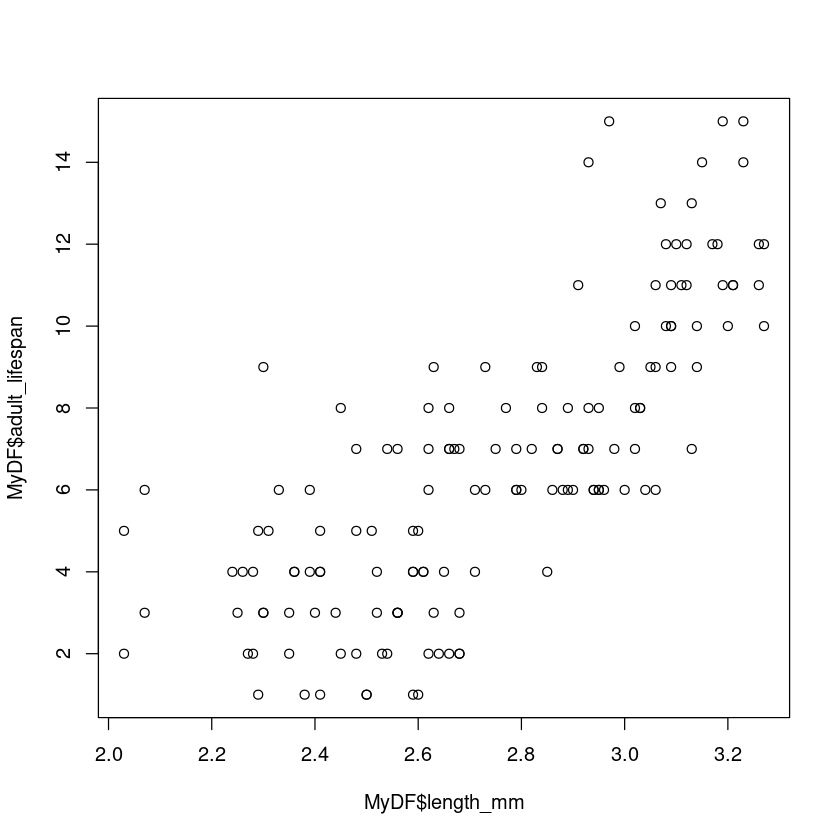

In [8]:
plot(MyDF$length_mm, MyDF$adult_lifespan)

That doesn't look very meaningful! Let's try taking logarithms. *Why?* - Because taking a log allows you to inspect the data in a meaningful (logarithmic) scale and reveals the true relationship. This also illustrates a important point. Just like statistical analyses, the effectiveness of data visualization too depends on the type of distribution of the data.

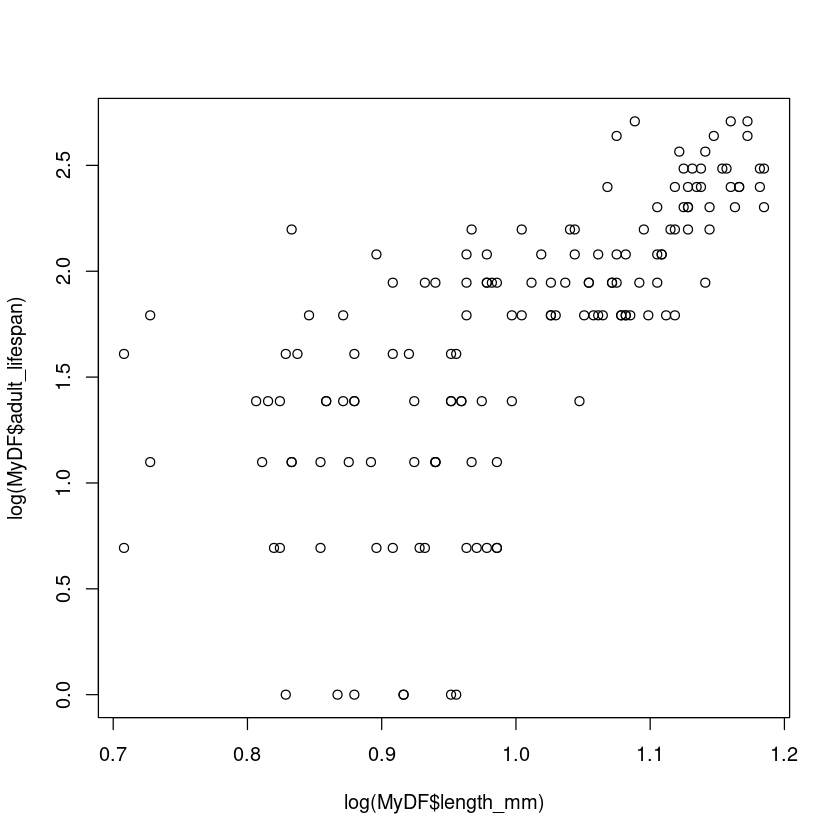

In [9]:
plot(log(MyDF$length_mm),log(MyDF$adult_lifespan))

Let's look at the same using a base-10 log transform: 

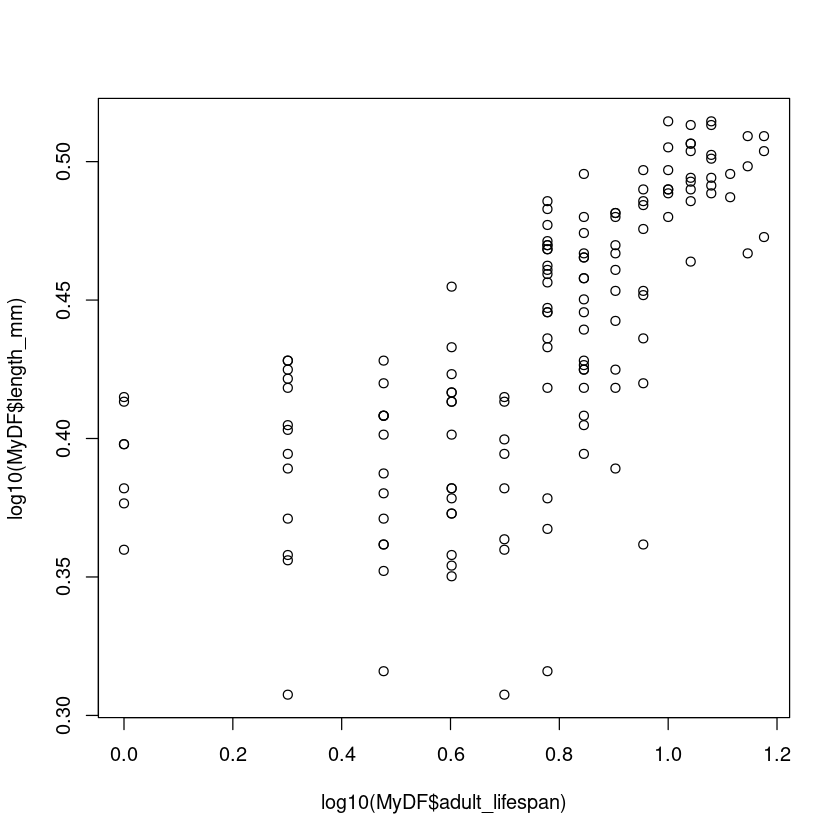

In [10]:
plot(log10(MyDF$adult_lifespan),log10(MyDF$length_mm))

Using a `log10` transform is often a good idea because then you can see things in terms of "orders of magnitude", ($10^1$, $10^2$, $10^3$, etc), which makes it easier to determine  what the actual values in the original scale are.

Notice also the labels can be changed using `xlab` and `ylab`.

We can change almost any aspect of the resulting graph; let's change the symbols by specifying the `plot` characters using `pch`:

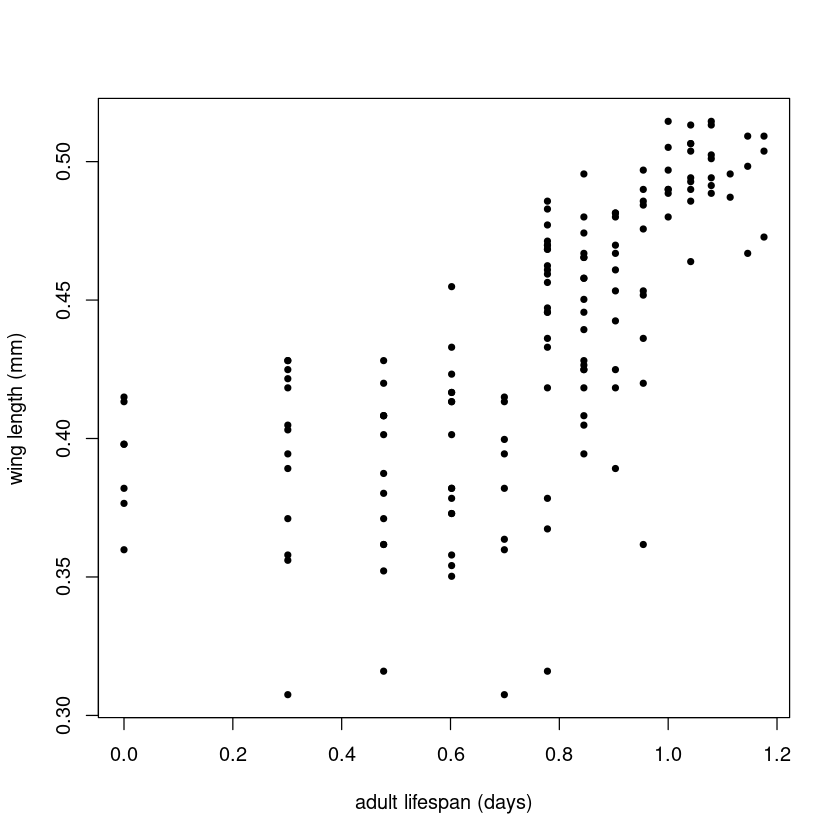

In [11]:
plot(log10(MyDF$adult_lifespan),log10(MyDF$length_mm), xlab = 'adult lifespan (days)', ylab = 'wing length (mm)', pch = 20)

A really great summary of basic R graphical parameters can be [found here](https://www.statmethods.net/advgraphs/parameters.html).

### Histograms

Why did we have to take a logarithm to see the relationship between
adult lifespan and wing length? Plotting histograms of the two classes
should be insightful, as we can then see the "marginal"
distributions of the two variables.

Let's first plot a histogram of wing length:

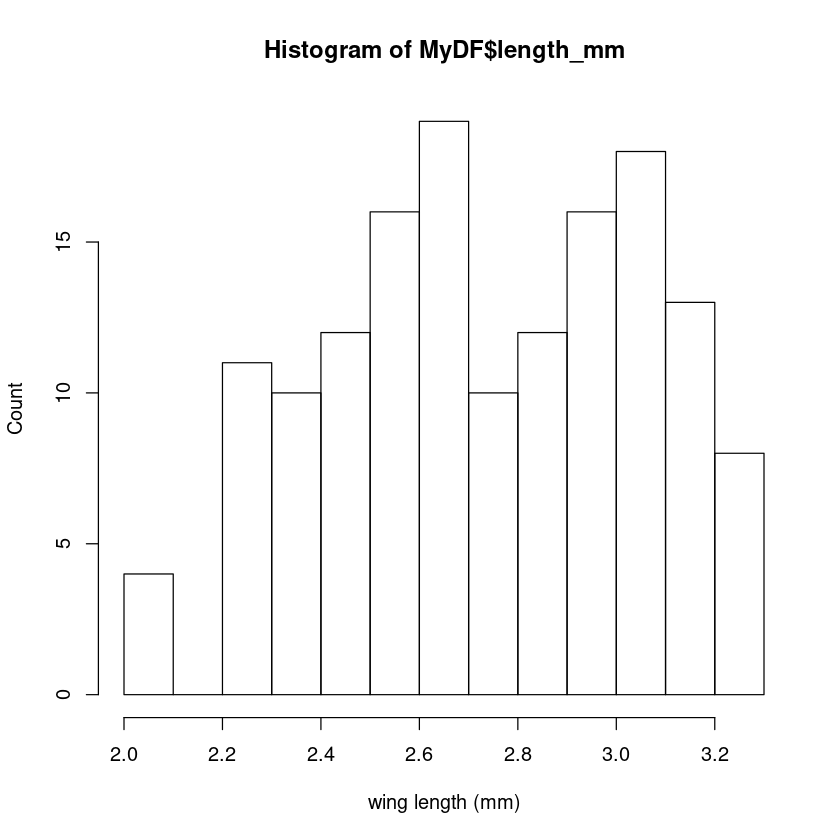

In [12]:
hist(MyDF$length_mm, xlab = 'wing length (mm)', ylab = "Count")

Let's now take a logarithm and see if we can get a better idea of what the distribution of winglengths look like:

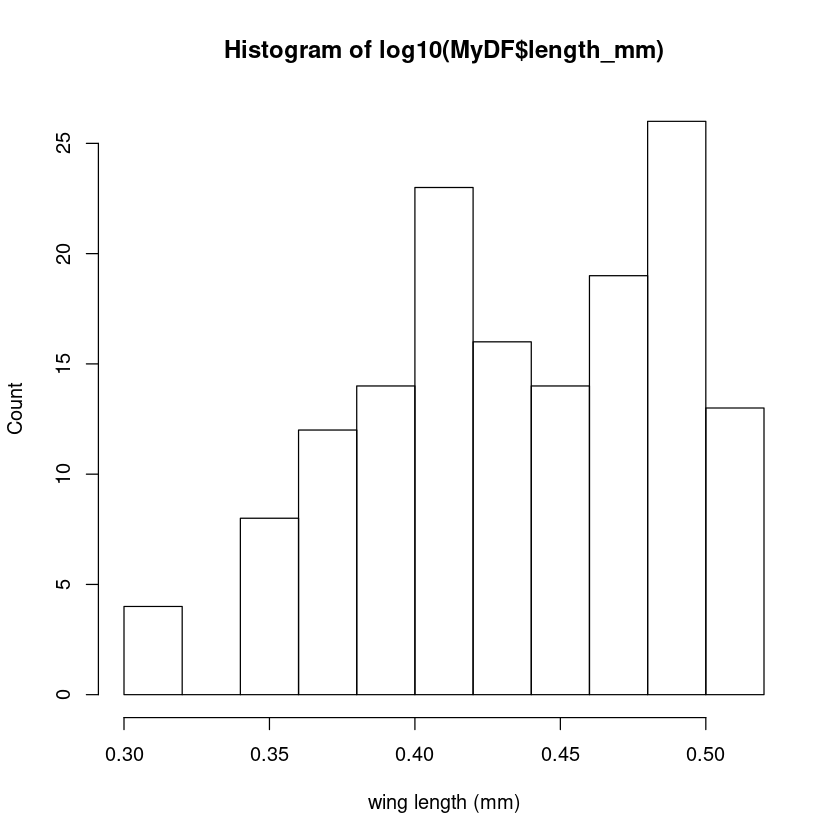

In [13]:
hist(log10(MyDF$length_mm), xlab = 'wing length (mm)', ylab = "Count")

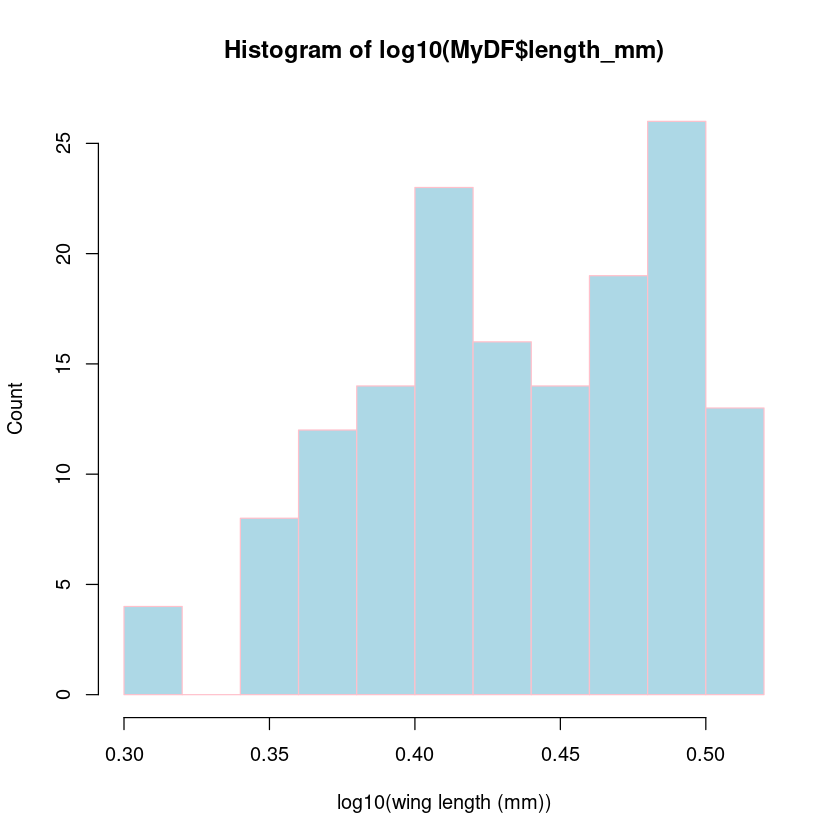

In [14]:
hist(log10(MyDF$length_mm),xlab="log10(wing length (mm))",ylab="Count", 
     col = "lightblue", border = "pink") # Change bar and borders colors

So, taking a log really makes clearer what the distribution of winglengths. 

### Subplots

Lets explore another aspect of this dataset. We will look at the relation of food level to the winglengths. Lets do this by making two subplots next to each other using `par`. `par` is a tool to specify the locations of plots relative to each other. The first step is to break the `food level` aspect into high and low:

In [15]:
MyDF_lowfood <-  subset(MyDF, food_level == '0.1')
MyDF_highfood <- subset(MyDF, food_level == '1')

Now we can start to look at whats going on with it.

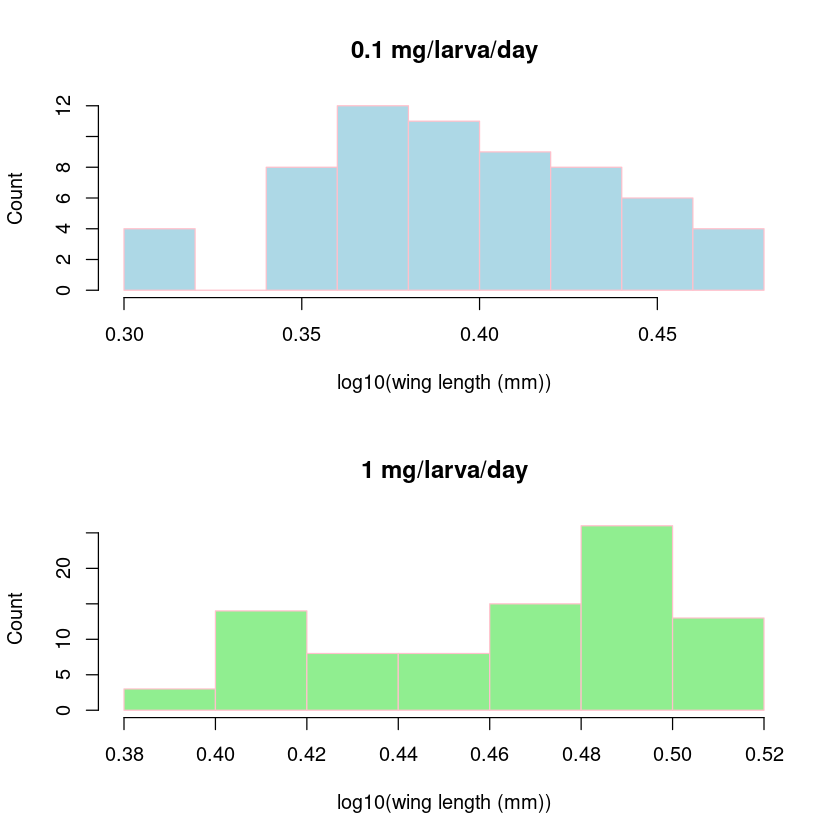

In [16]:
par(mfcol=c(2,1)) #initialize multi-paneled plot
par(mfg = c(1,1)) # specify which sub-plot to use first 
hist(log10(MyDF_lowfood$length_mm), # low-histogram
     xlab = "log10(wing length (mm))", ylab = "Count", col = "lightblue", border = "pink", 
     main = '0.1 mg/larva/day') # Add title
par(mfg = c(2,1)) # Second sub-plot
hist(log10(MyDF_highfood$length_mm), xlab="log10(wing length (mm))",
     ylab="Count", col = "lightgreen", border = "pink", main = '1 mg/larva/day')

The `par()` function can set multiple graphics parameters (not just multi-panel plots), including figure margins, axis labels, and more. Check out the [help for this function](https://www.rdocumentation.org/packages/graphics/versions/3.5.1/topics/par).

Another option for making multi-panel plots is the `layout` function.

### Overlaying plots

Better still, we can overlay plots:

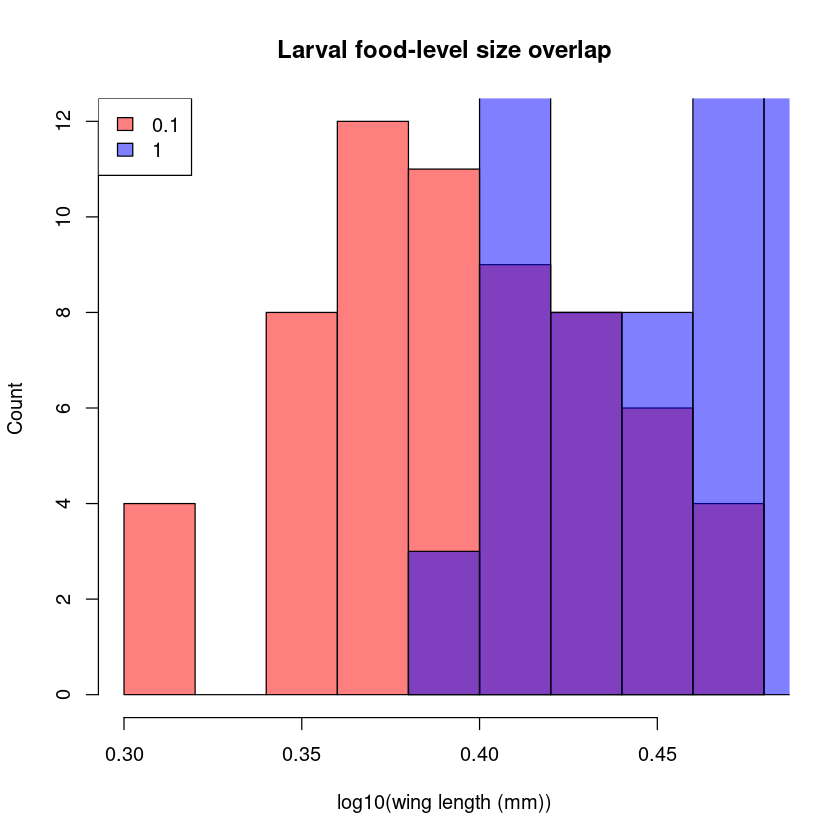

In [17]:
par(mfrow=c(1,1)) #initialize multi-paneled plot
hist(log10(MyDF_lowfood$length_mm), # high-food histogram
     xlab="log10(wing length (mm))", ylab="Count", 
     col = rgb(1, 0, 0, 0.5), # Note 'rgb', fourth value is transparency
     main = "Larval food-level size overlap") 
hist(log10(MyDF_highfood$length_mm), col = rgb(0, 0, 1, 0.5), add = T) # Plot high food
legend('topleft',c('0.1','1'),   # Add legend
       fill=c(rgb(1, 0, 0, 0.5), rgb(0, 0, 1, 0.5))) # Define legend colors

Plot annotation with text can be done with either single or double quotes, i.e., 'Plot Title' or "Plot Title", respectively. But it is  generally a good idea to use double quotes because sometimes you would like to use an apostrophe in your title or axis label strings.


### Boxplots

Now, let's try plotting boxplots instead of histograms. These are useful for getting a visual summary of the distribution of your data.

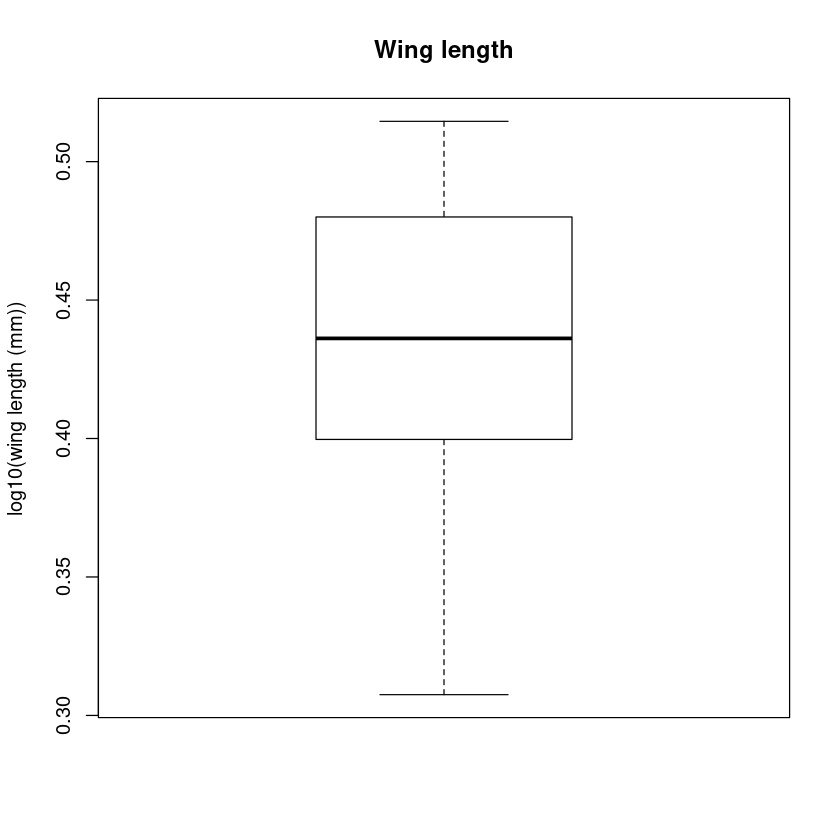

In [18]:
boxplot(log10(MyDF$length_mm), xlab = "", ylab = "log10(wing length (mm))", main = "Wing length")

Now let's see how many temperatures are in included in the data:

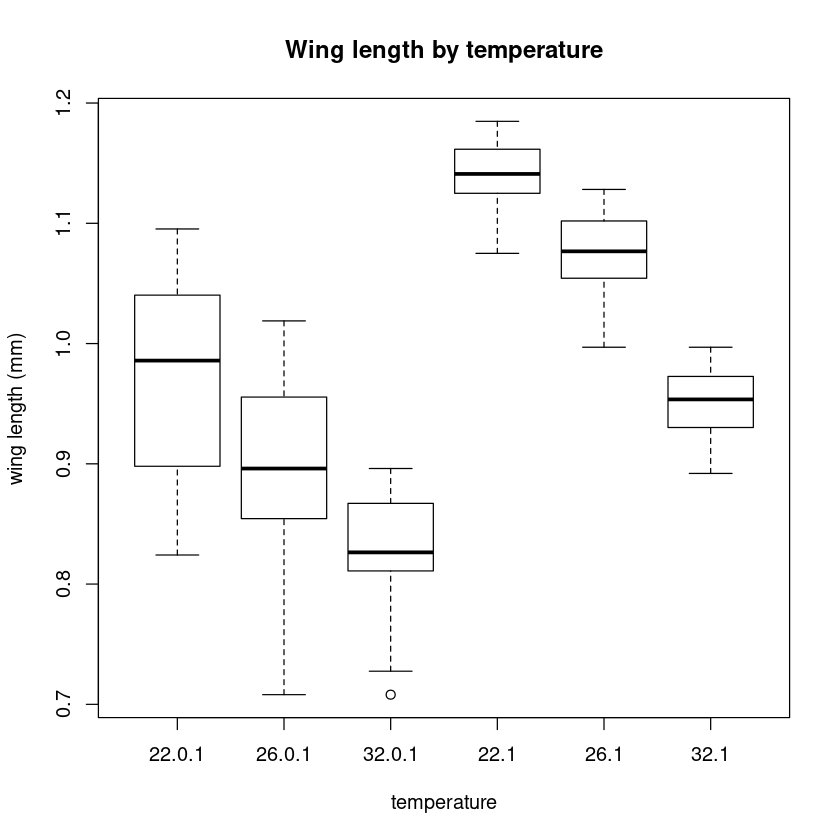

In [19]:
boxplot(log(MyDF$length_mm) ~ MyDF$temp+MyDF$food_level, # Why the tilde?
        xlab = "temperature", ylab = "wing length (mm)",
        main = "Wing length by temperature")

Note the tilde (`~`). This is to tell R to subdivide or categorize your analysis and plot by the "Factor" location. More on this later.


### Combining plot types

It would be nice to see both the high and low food (marginal) distributions as well as the scatterplot for an exploratory analysis. We can do this by adding boxplots of the marginal variables to the scatterplot.

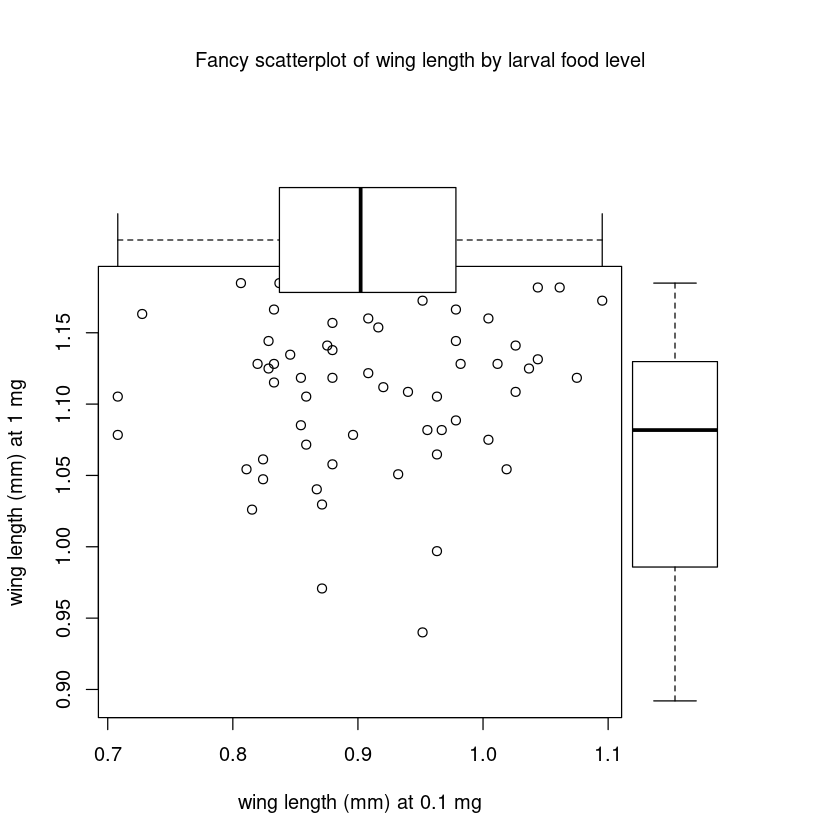

In [20]:
par(fig=c(0,0.8,0,0.8)) # specify figure size as proportion
plot(log(MyDF_lowfood$length_mm),log(MyDF_highfood$length_mm), xlab = "wing length (mm) at 0.1 mg", ylab = "wing length (mm) at 1 mg") # Add labels
par(fig=c(0,0.8,0.4,1), new=TRUE)
boxplot(log(MyDF_lowfood$length_mm), horizontal=TRUE, axes=FALSE)
par(fig=c(0.55,1,0,0.8),new=TRUE)
boxplot(log(MyDF_highfood$length_mm), axes=FALSE)
mtext("Fancy scatterplot of wing length by larval food level", side=3, outer=TRUE, line=-3)

To understand this plotting method, think of the full graph area as going from (0,0) in the lower left corner to (1,1) in the upper right corner. The format of the `fig=` parameter is a numerical vector of the form `c(x1, x2, y1, y2)`, corresponding to `c(bottom, left, top, right)`. First, ` par(fig=c(0,0.8,0,0.8))` sets up the scatterplot going from 0 to 0.8 on the x axis and 0 to 0.8 on the y axis, leaving some area for the boxplots at the top and right. The top boxplot goes from 0 to 0.8 on the x axis and 0.4 to 1 on the y axis. The right hand boxplot goes from 0.55 to 1 on the x axis and 0 to 0.8 on the y axis. You can experiment with these proportions to change the spacings between plots.

This plot is useful, because it shows you what the marginal distributions of the two variables are. 


Below you will learn to use `ggplot` to produce a much more elegant, pretty multi-panel plots. 


### Saving your graphics

And you can also save the figure in a vector graphics format like a pdf. It is important to learn to do this, because you want to be able to save your plots in good resolution, and want to avoid the manual steps of
clicking on the figure, doing "save as", etc. So let's save the figure as a PDF:

In [41]:
par(fig=c(0,0.8,0,0.8))
pdf("larvalfoodwing.pdf", # Open blank pdf page using a relative path
    11.7, 8.3) # These numbers are page dimensions in inches
hist(log(MyDF_lowfood$length_mm), # Plot predator histogram (note 'rgb')
     xlab="wing length (mm)", ylab="Count", col = rgb(1, 0, 0, 0.5), main = "Overlap in wing length by larval food level") 
hist(log(MyDF_highfood$length_mm), # Plot prey weights
     col = rgb(0, 0, 1, 0.5), 
     add = T)  # Add to same plot = TRUE
legend('topleft',c('0.1 mg/larva/day','1 mg/larva/day'), # Add legend
       fill=c(rgb(1, 0, 0, 0.5), rgb(0, 0, 1, 0.5))) 

graphics.off() # you can also use dev.off()

Always try to save results in a vector format, which can be scaled up to any size. For more on vector vs raster images/graphics, [see this](https://en.wikipedia.org/wiki/Vector_graphics).

Note that you are saving to the `results` directory now. This is a recommended project organization and workflow: store and retrieve data from a `
Data` directory, keep your code and work from a `Code` directory, and save outputs to a `results` directory.

You can also try other graphic output formats. For example, `png()` (a raster format) instead of `pdf()`. As always, look at the help documentation of each of these commands!

## Beautiful graphics in R

R can produce beautiful visualizations, but it typically takes a lot of work to obtain the desired result. This is because the starting point is pretty much a "bare" plot, and adding features commonly required for publication-grade figures (legends, statistics, regressions, sub-plotting etc.) can require a lot of small and painful additional arguments to the plotting commands *at the same time*, or even additional steps).

Moreover, it is very difficult to switch from one representation of the data to another (i.e., from boxplots to scatterplots), or to plot several datasets together. The R package `ggplot2` overcomes these issues, and produces truly high-quality, publication-ready graphics suitable for papers, theses and reports.

```{note}
**3D plots:** *Currently, `ggplot2` cannot be used to create 3D graphs or mosaic plots (but [see this](https://www.tylermw.com/3d-ggplots-with-rayshader)). In any case, most of you won't be needing 3D plots. If you do, there are many ways to do 3D plots using other plotting packages in R. In particular, look up the `scatterplot3d` and `plot3D` packages.* ***I don't think this is true anymore, I made a weird 3d monster for a paper a while ago.***
```

`ggplot2` differs from other approaches as it attempts to provide a "grammar" for graphics in which each layer is the equivalent of a verb, subject etc. and a plot is the equivalent of a sentence. All graphs start with a layer showing the data, other layers and attributes/styles are added to modify the plot. Specifically, according to this grammar, a statistical graphic is a "mapping" from data to geometric objects (points, lines, bars; set using `geom`) with aesthetic attributes (colour, shape, size; set using `aes`).

For more on the ideas underlying ggplot, see the book "ggplot2: Elegant Graphics for Data Analysis", by H. Wickham (in your Reading directory). Also, the [ggplot2 website](http://ggplot2.tidyverse.org/) is an excellent resource.


ggplot can be used in two ways: with `qplot` (for `q`uick ` plot`ting) and `ggplot` for fully customized plotting.

*Note that `ggplot2` only accepts data in data frames.*

### Quick plotting with `qplot`

`qplot` can be used to quickly produce graphics for exploratory data analysis, and as a base for more complex graphics. It uses syntax that is closer to the standard R plotting commands.

We will use the same Huxley et al. dataset again – you will soon see how much nicer the same types of plots you made above look when done with ggplot!

First, load the package:

In [22]:
require(ggplot2)
MyDF <- subset(MyDF, length_mm != 'NA') # omit individuals that did not survive to adulthood (i.e. wing length = NA)

#### Scatterplots

Let's start plotting the `winglength` vs `adult lifespan`:

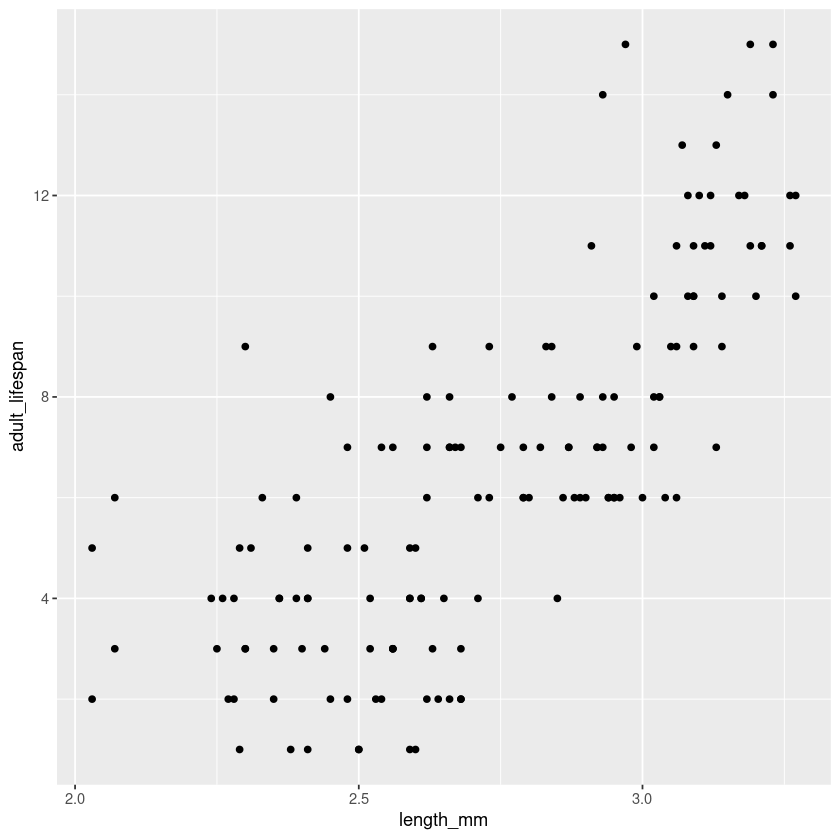

In [23]:
qplot(length_mm, adult_lifespan, data = MyDF)

As before, let's take logarithms and plot:

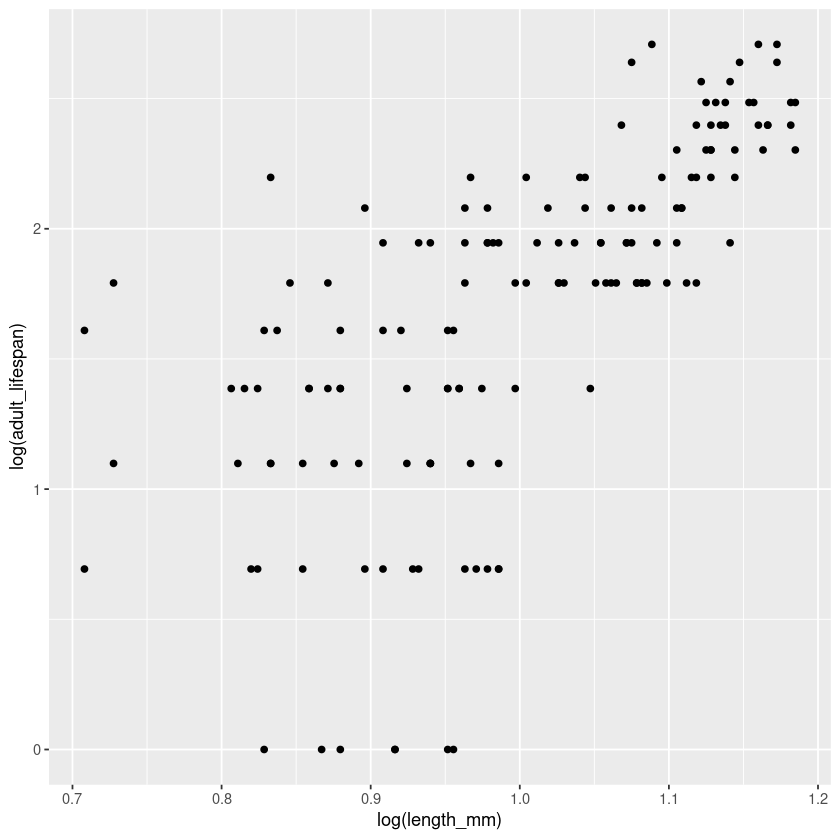

In [24]:
qplot(log(length_mm), log(adult_lifespan), data = MyDF)

Now, color the points according to the food level:

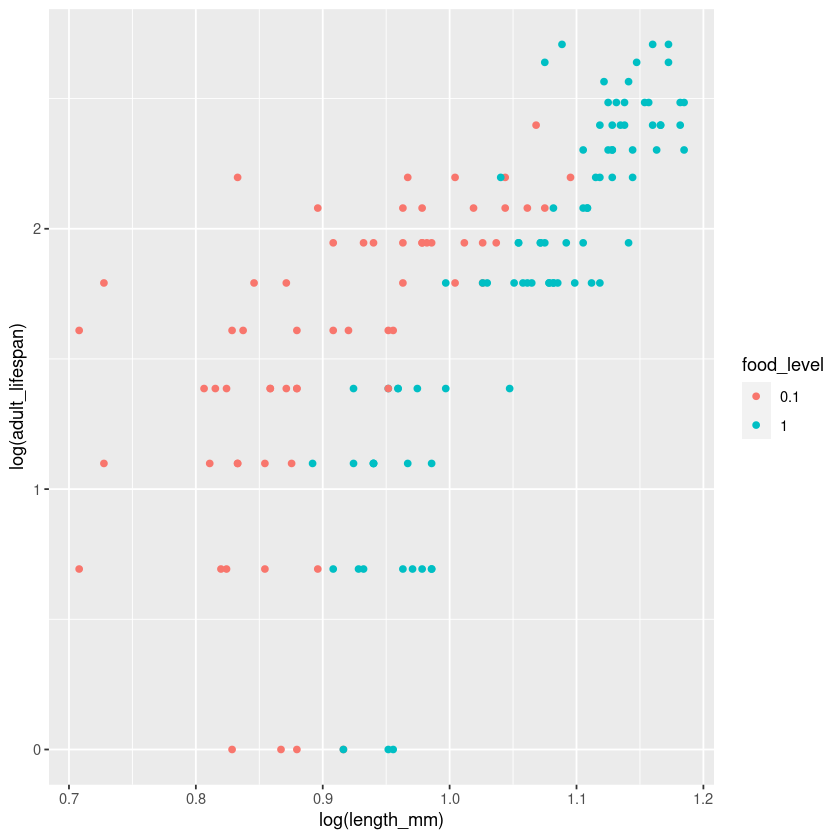

In [25]:
qplot(log(length_mm), log(adult_lifespan), col=food_level, data = MyDF)

But the figure's aspect ratio is not very nice. Let's change it using the `asp` option:

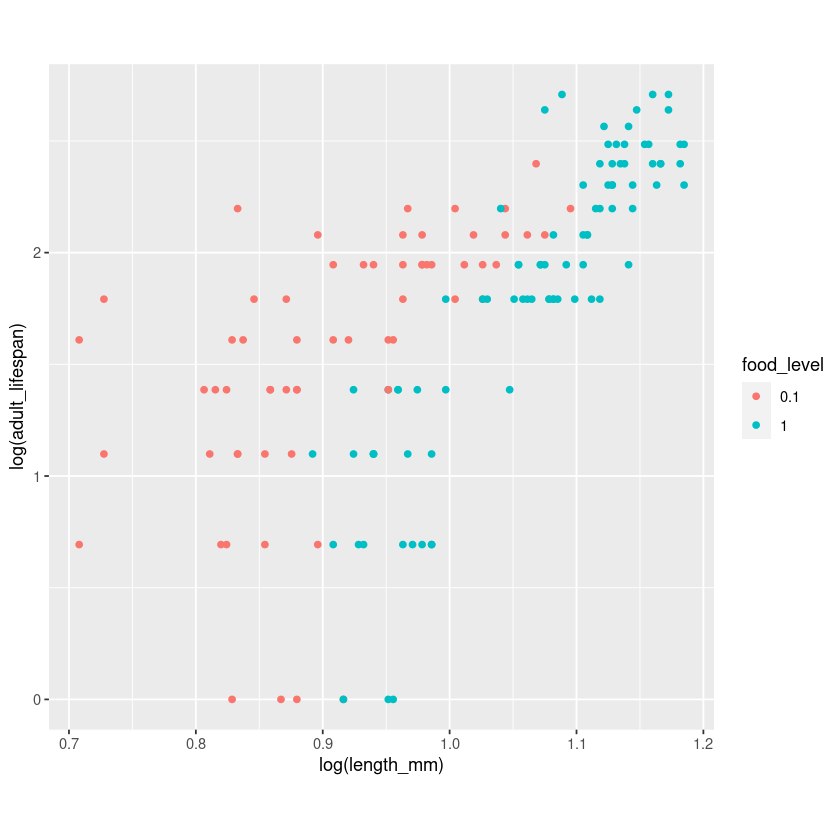

In [26]:
qplot(log(length_mm), log(adult_lifespan), col=food_level, data = MyDF,asp = 1)

The same as above, but changing the shape:

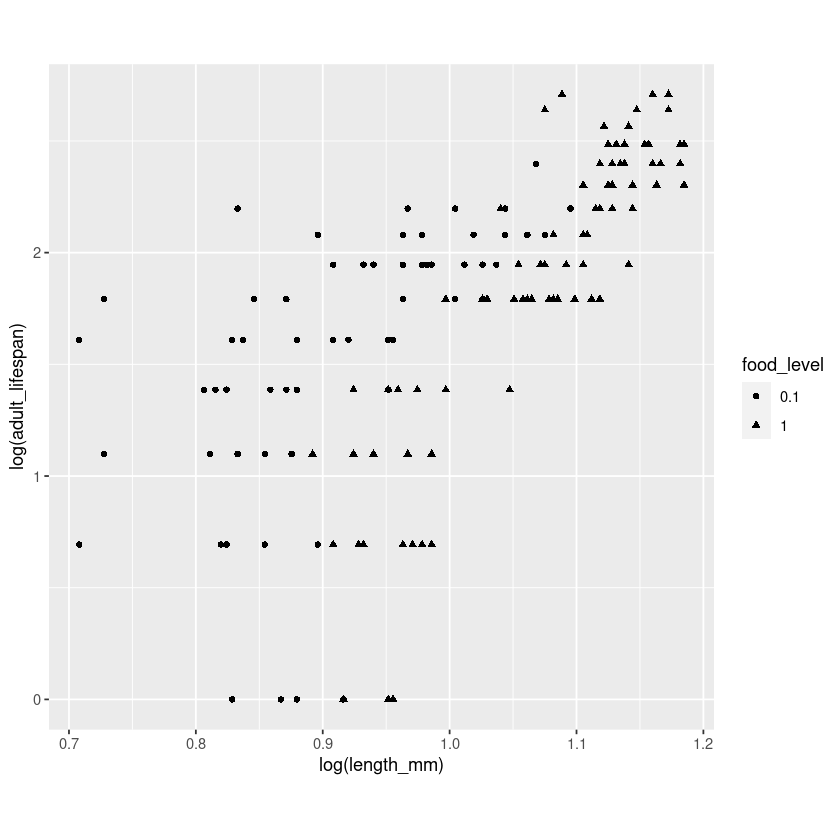

In [27]:
qplot(log(length_mm), log(adult_lifespan), shape=food_level, data = MyDF,asp = 1)

#### Aesthetic mappings

These examples demonstrate a key difference between `qplot` (and indeed, ggplot2's approach) and the standard `plot` command: When you want to assign colours, sizes or shapes to the points on your plot, using the `plot` command, it's your responsibility to convert (i.e., "map") a categorical variable in your data (e.g., type of feeding interaction in the above case) onto colors (or shapes) that `plot` knows how to use (e.g., by specifying "red", "blue", "green", etc).

ggplot does this mapping for you automatically, and also provides a legend! This makes it really easy to quickly include additional data (e.g., if a new feeding interaction type was added to the data) on the plot.

Instead of using ggplot's automatic mapping, if you want to manually set a color or a shape, you have to use `I()` (meaning "Identity").

#### Setting transparency

Because there are so many points, we can make them semi-transparent using `alpha` so that the overlaps can be seen:

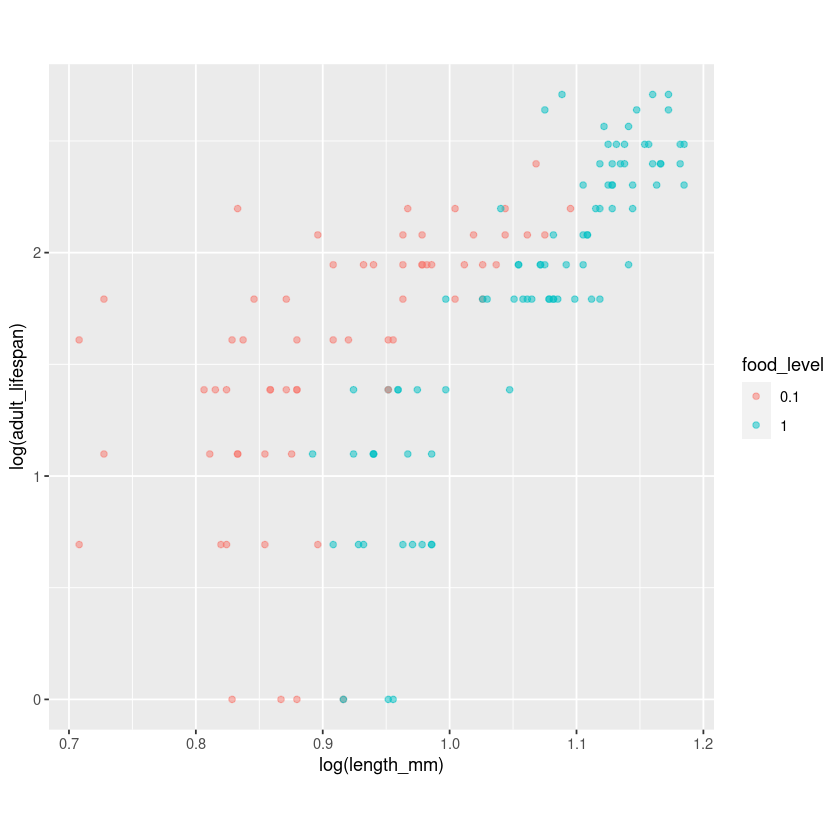

In [28]:
qplot(log(length_mm), log(adult_lifespan), col=food_level,alpha=I(0.5), data = MyDF,asp = 1)

Here, try using `alpha = .5` instead of `alpha = I(.5)` and see what happens.

## Box plots in ggplot
Boxplots will work largely the same way they have before. We need to make the `geom` argument in ggplot.

Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”
Warning message:
“Removed 121 rows containing non-finite values (stat_boxplot).”


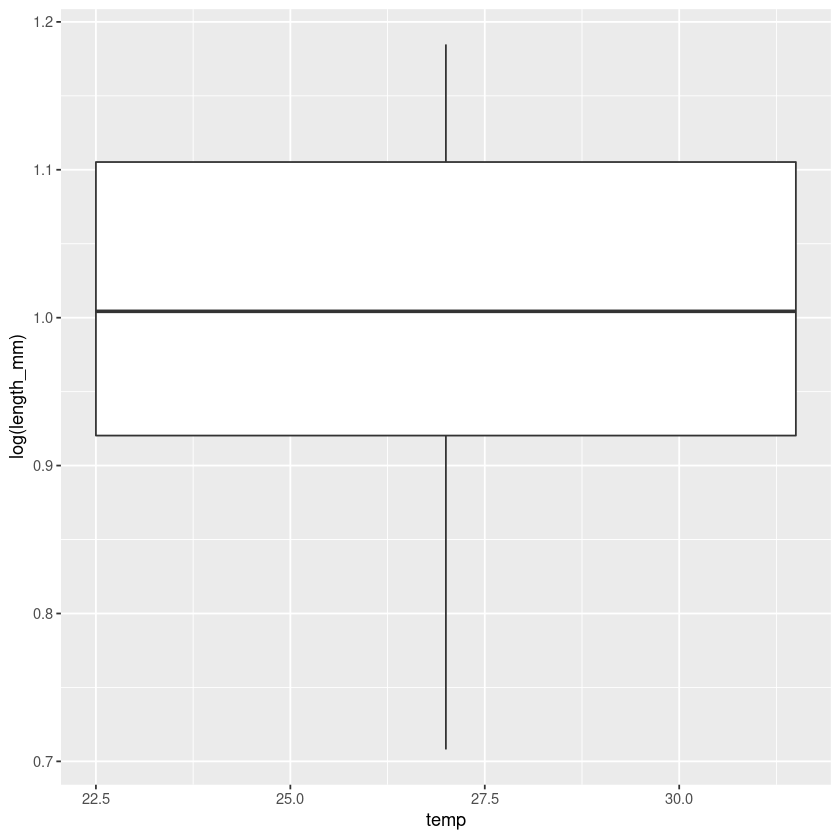

In [27]:
qplot(temp, log(length_mm), geom = 'boxplot', data = MyDF)

#### Saving your plots

Finally, let's save a pdf file of the figure (same approach as we [used before](#Saving-your-graphics)):

In [28]:
pdf("MyFirst-ggplot2-Figure.pdf")
print(qplot(length_mm, adult_lifespan, data = MyDF,log="xy",
            main = "Relationship between wing length and adult lifespan", 
            xlab = "log(wing length) (mm)", 
            ylab = "log(adult lifespan) (days)") + theme_bw())
dev.off()


Warning message:
“Removed 121 rows containing missing values (geom_point).”


png 
  2

Using `print` ensures that the whole command is kept together and that you can use the command in a script.

### Some more important ggplot options

Other important options to keep in mind:

|   Option            |                |
|--- |--- |
|`xlim`      | limits for x axis: `xlim = c(0,12)`|
|`ylim`      | limits for y axis|
|`log`       |log transform variable `log = "x"`, `log = "y"`, `log = "xy"`|
|`main`      |title of the plot `main = "My Graph"`|
|`xlab`      |x-axis label|
|`ylab`      |y-axis label|
|`asp`       | aspect ratio `asp = 2`, `asp = 0.5`|
|`margins`   |whether or not margins will be displayed|


### The `geom` argument

`geom` Specifies the geometric objects that define the graph type. The geom option is expressed as a R character vector with one or more entries. geom values include "point", "smooth", "boxplot", "line", "histogram", "density", "bar", and "[jitter](https://www.youtube.com/watch?v=3tRFL4q5m7c)".


### Advanced plotting: `ggplot`

The command `qplot` allows you to use only a single dataset and a single set of "aesthetics" (x, y, etc.). To make full use of `ggplot2`, we need to use the command `ggplot`, which allows you to use "layering". Layering is the mechanism by which additional data elements are added to a plot. Each layer can come from a different dataset and have a different aesthetic mapping, allowing us to create plots that could not be generated using `qplot()`, which permits only a single dataset and a single set of aesthetic mappings.

For a `ggplot` plotting command, we need at least:

-   The data to be plotted, in a data frame;

-   Aesthetics mappings, specifying which variables we want to plot, and how;

-   The `geom`, defining the geometry for representing the data;

-   (Optionally) some `stat` that transforms the data or performs statistics using the data.

To start a graph, we must specify the data and the aesthetics:

In [29]:
p <- ggplot(MyDF, aes(x = log(length_mm),
                      y = log(adult_lifespan),
                      colour = food_level))

Here we have created a graphics object `p` to which we can add layers and other plot elements.

Now try to plot the graph:

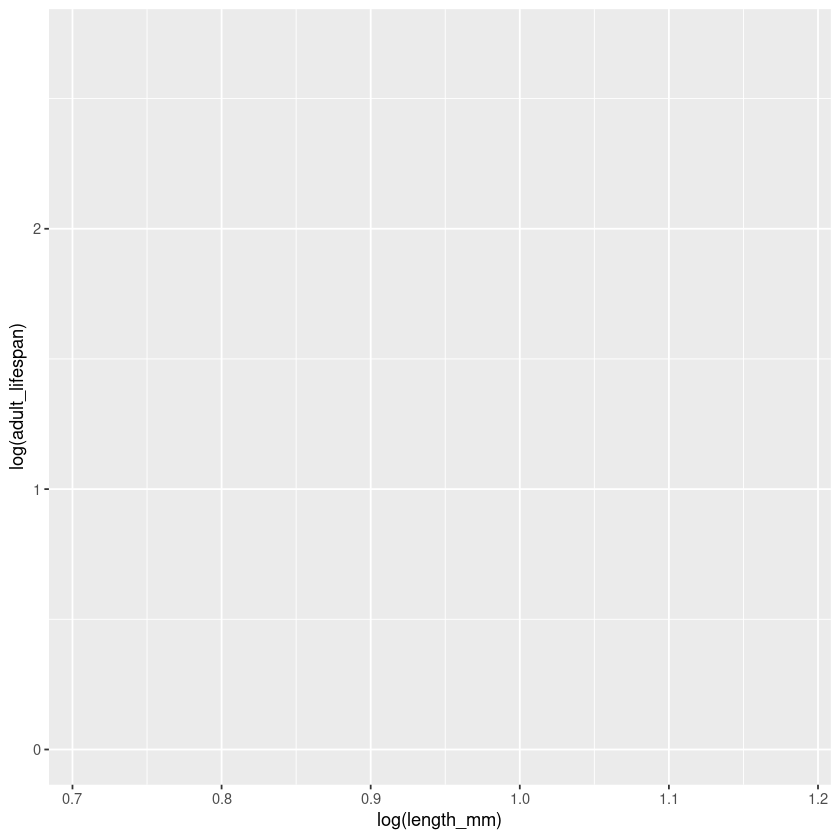

In [30]:
p

Plot is blank because we are yet to specify a geometry — only then can we see the graph:

Warning message:
“Removed 121 rows containing missing values (geom_point).”


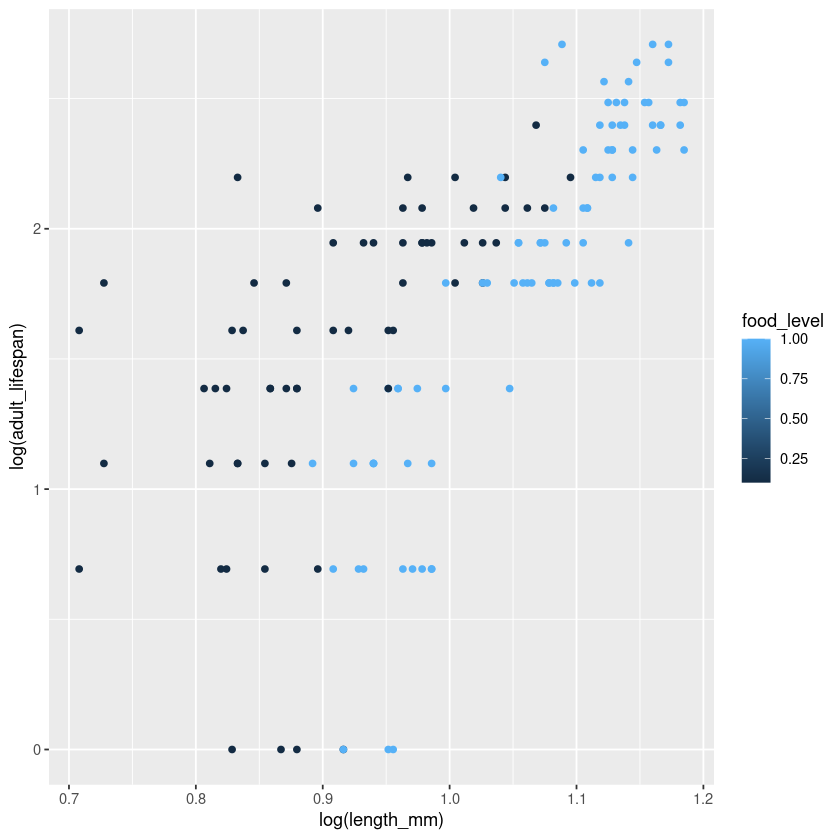

In [33]:
q <- p + geom_point()
q

We can use the "+" sign to concatenate different commands:

Warning message:
“Removed 121 rows containing missing values (geom_point).”


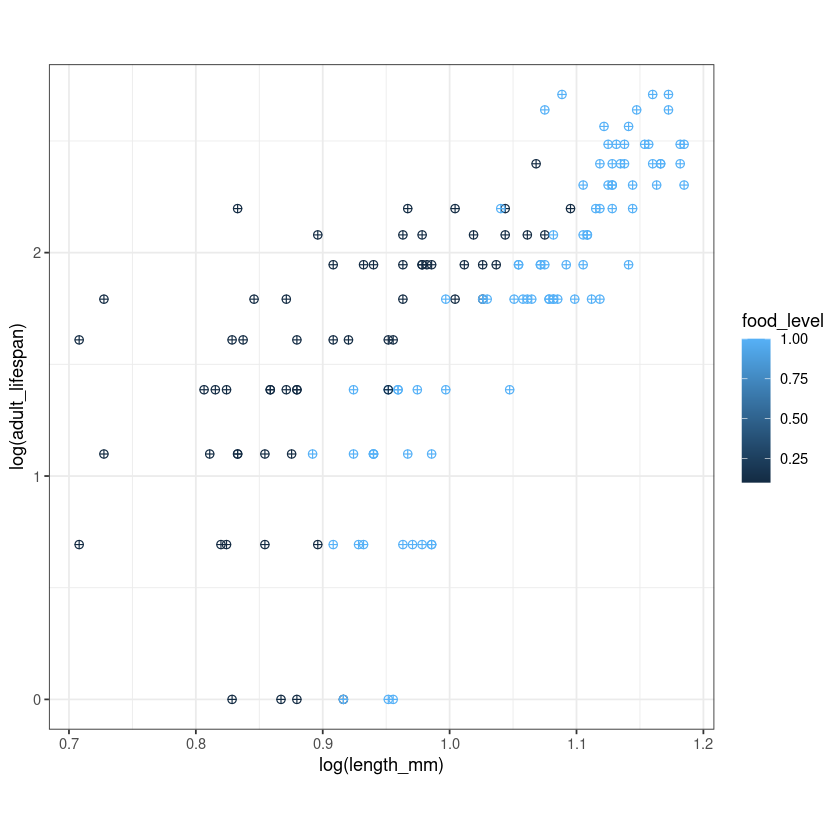

In [34]:
q <- p + geom_point(size=I(2), shape=I(10)) +
  theme_bw() + # make the background white
  theme(aspect.ratio=1) #make the plot square
q

Let's remove the legend:

Warning message:
“Removed 121 rows containing missing values (geom_point).”


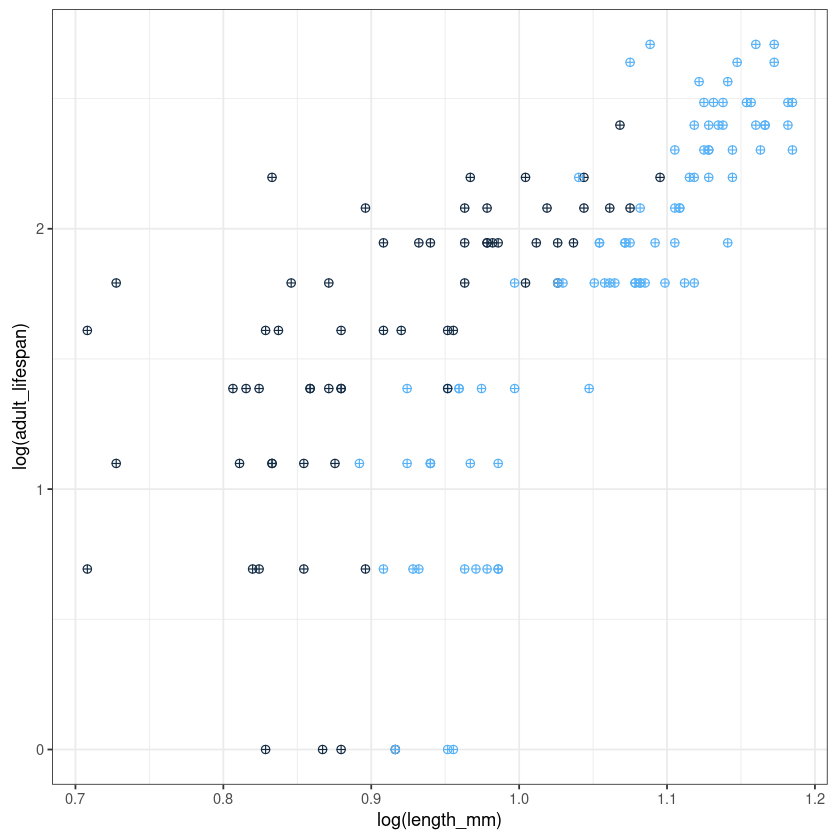

In [36]:
q + theme(legend.position = "none") + theme(aspect.ratio=1)

To make it easier to read, we can plot the smoothed density of the data:

Warning message:
“Removed 121 rows containing non-finite values (stat_density).”


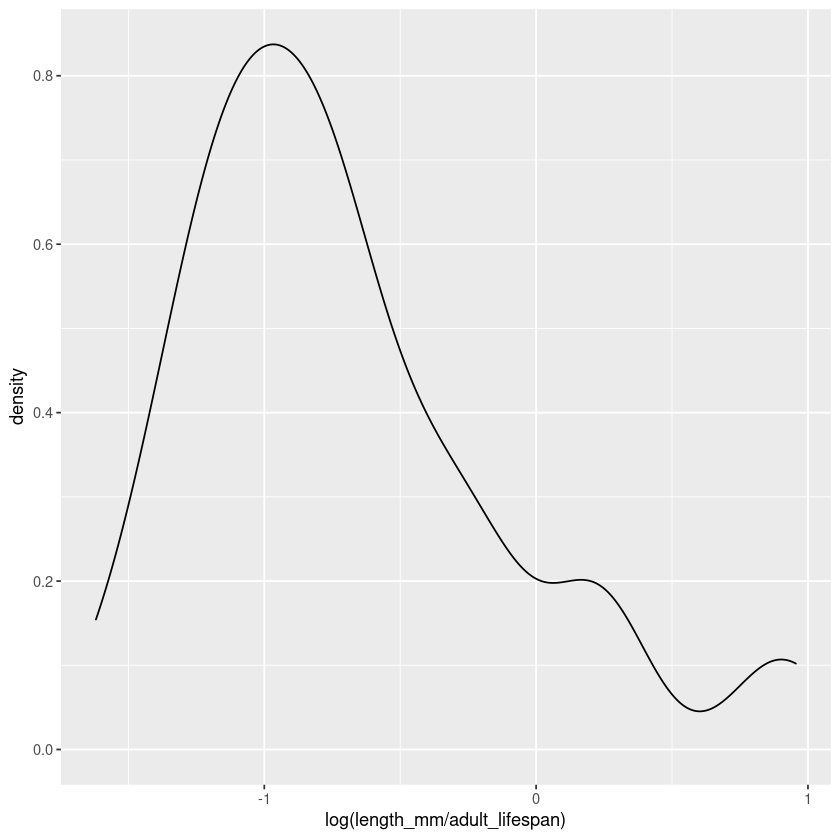

In [37]:
p <- ggplot(MyDF, aes(x = log(length_mm/adult_lifespan), fill = food_level )) + geom_density()
p

Warning message:
“Removed 121 rows containing non-finite values (stat_density).”
Warning message:
“Removed 121 rows containing non-finite values (stat_density).”


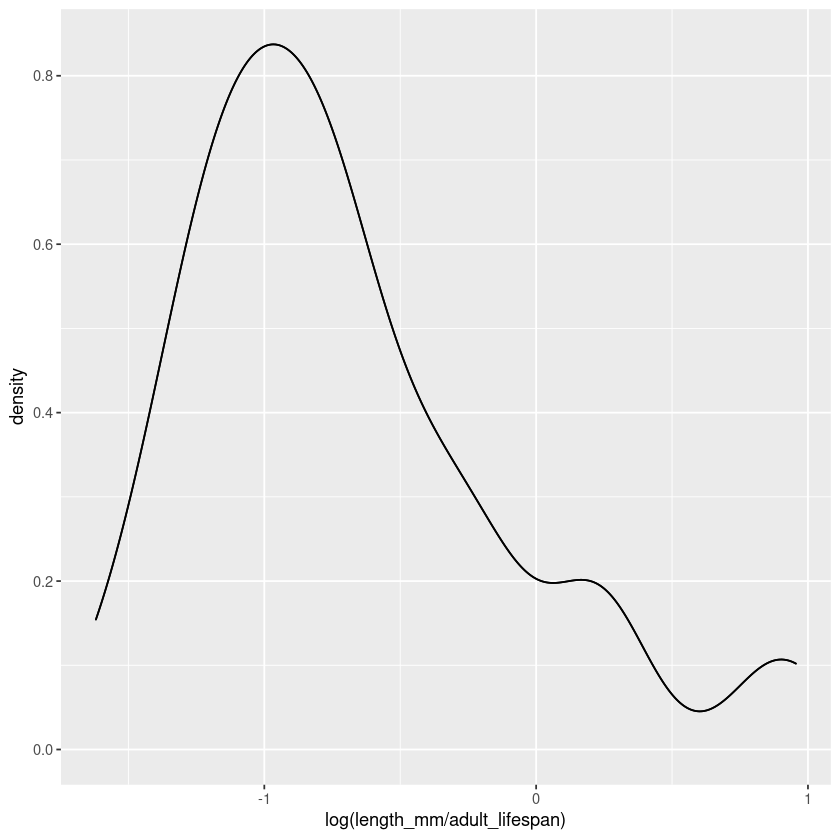

In [38]:
p <- p + geom_density(alpha=0.5)
p

Warning message:
“Removed 121 rows containing non-finite values (stat_density).”
Warning message:
“Removed 121 rows containing non-finite values (stat_density).”
Warning message:
“Removed 121 rows containing non-finite values (stat_density).”


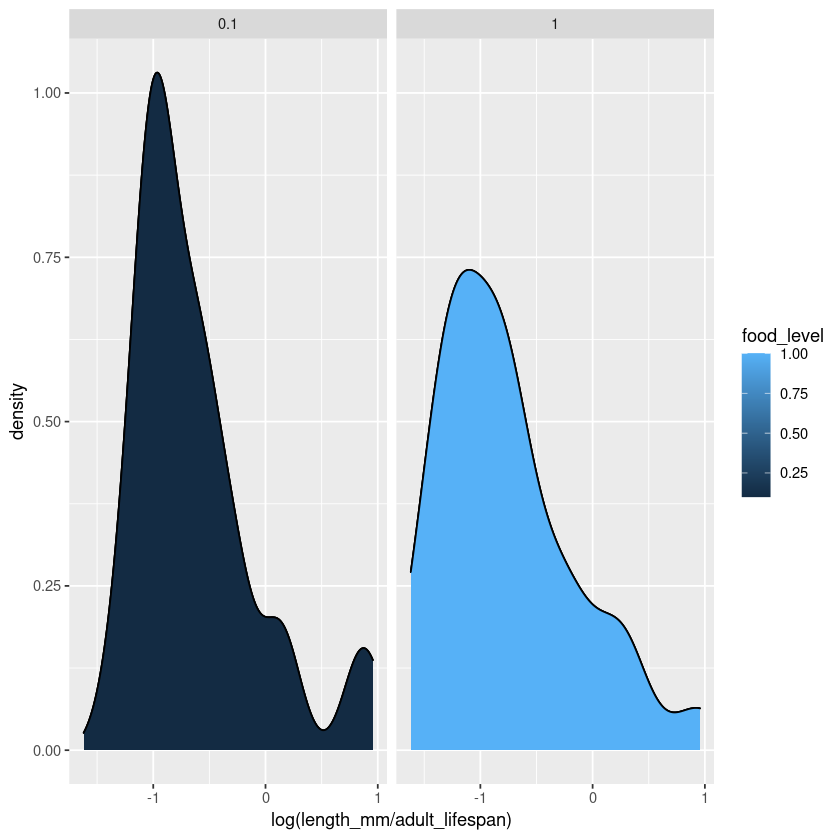

In [39]:
p <- p + geom_density()+facet_wrap( .~ food_level)
p

You can also combine categories like this

In [40]:
options(repr.plot.width=12, repr.plot.height= 14) # Change plot size (in cm)

You can also create a multifaceted plot:

Warning message:
“Removed 121 rows containing missing values (geom_point).”


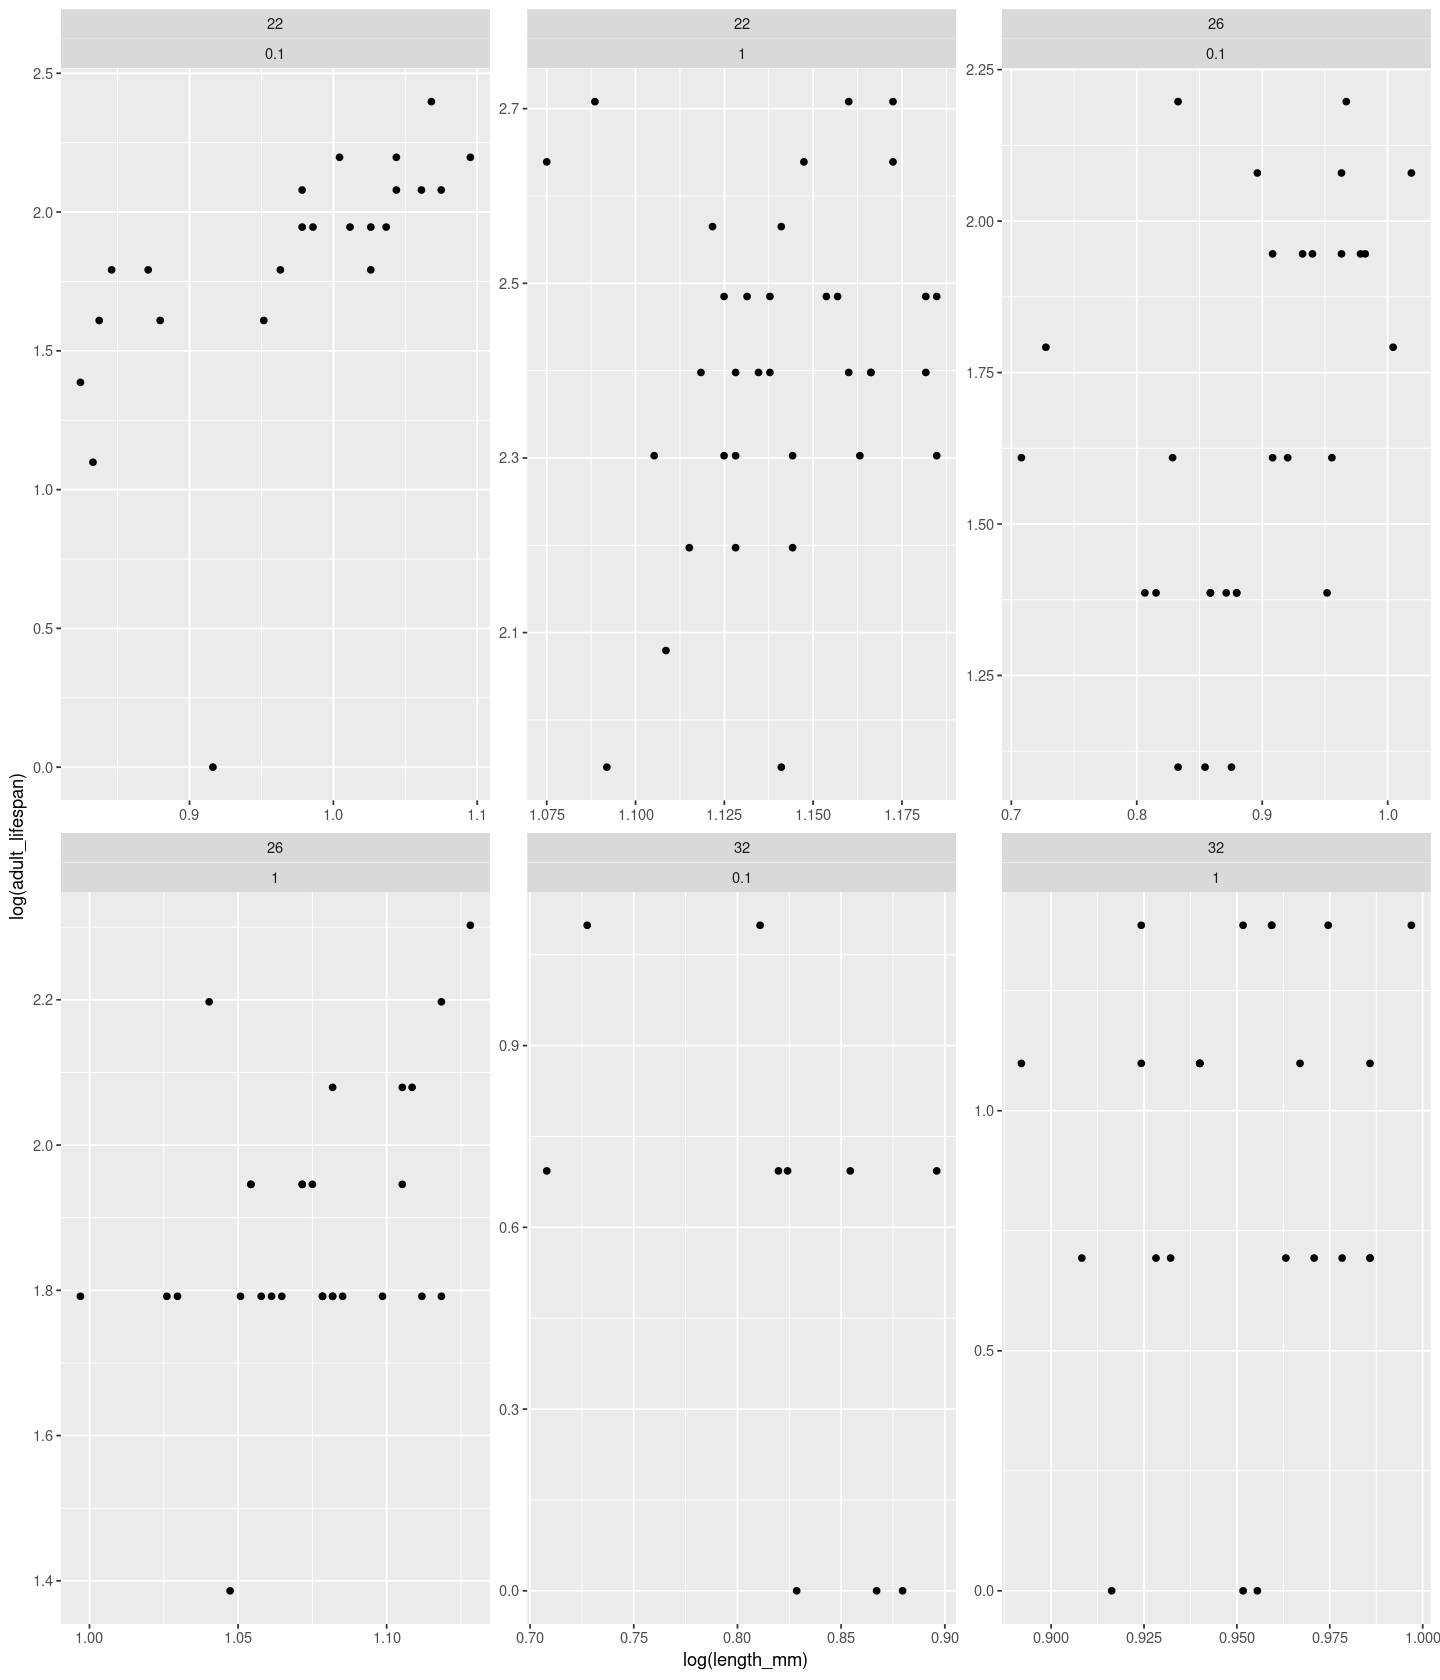

In [41]:
ggplot(MyDF, aes(x = log(length_mm), y = log(adult_lifespan))) +
geom_point() + facet_wrap( .~ temp + food_level, scales = "free")

```{tip}
In `facet_wrap`, You can also free up just the x or y scales; look up the documentation for this function.
```

## Mathematical display

Let's try mathematical annotation on a axis, and in the plot area.

First create some linear regression "data":

In [44]:
x <- seq(0, 100, by = 0.1)
y <- -4. + 0.25 * x + rnorm(length(x), mean = 0., sd = 2.5)

and put them in a dataframe

In [45]:
my_data <- data.frame(x = x, y = y)

perform a linear regression

In [46]:
my_lm <- summary(lm(y ~ x, data = my_data))

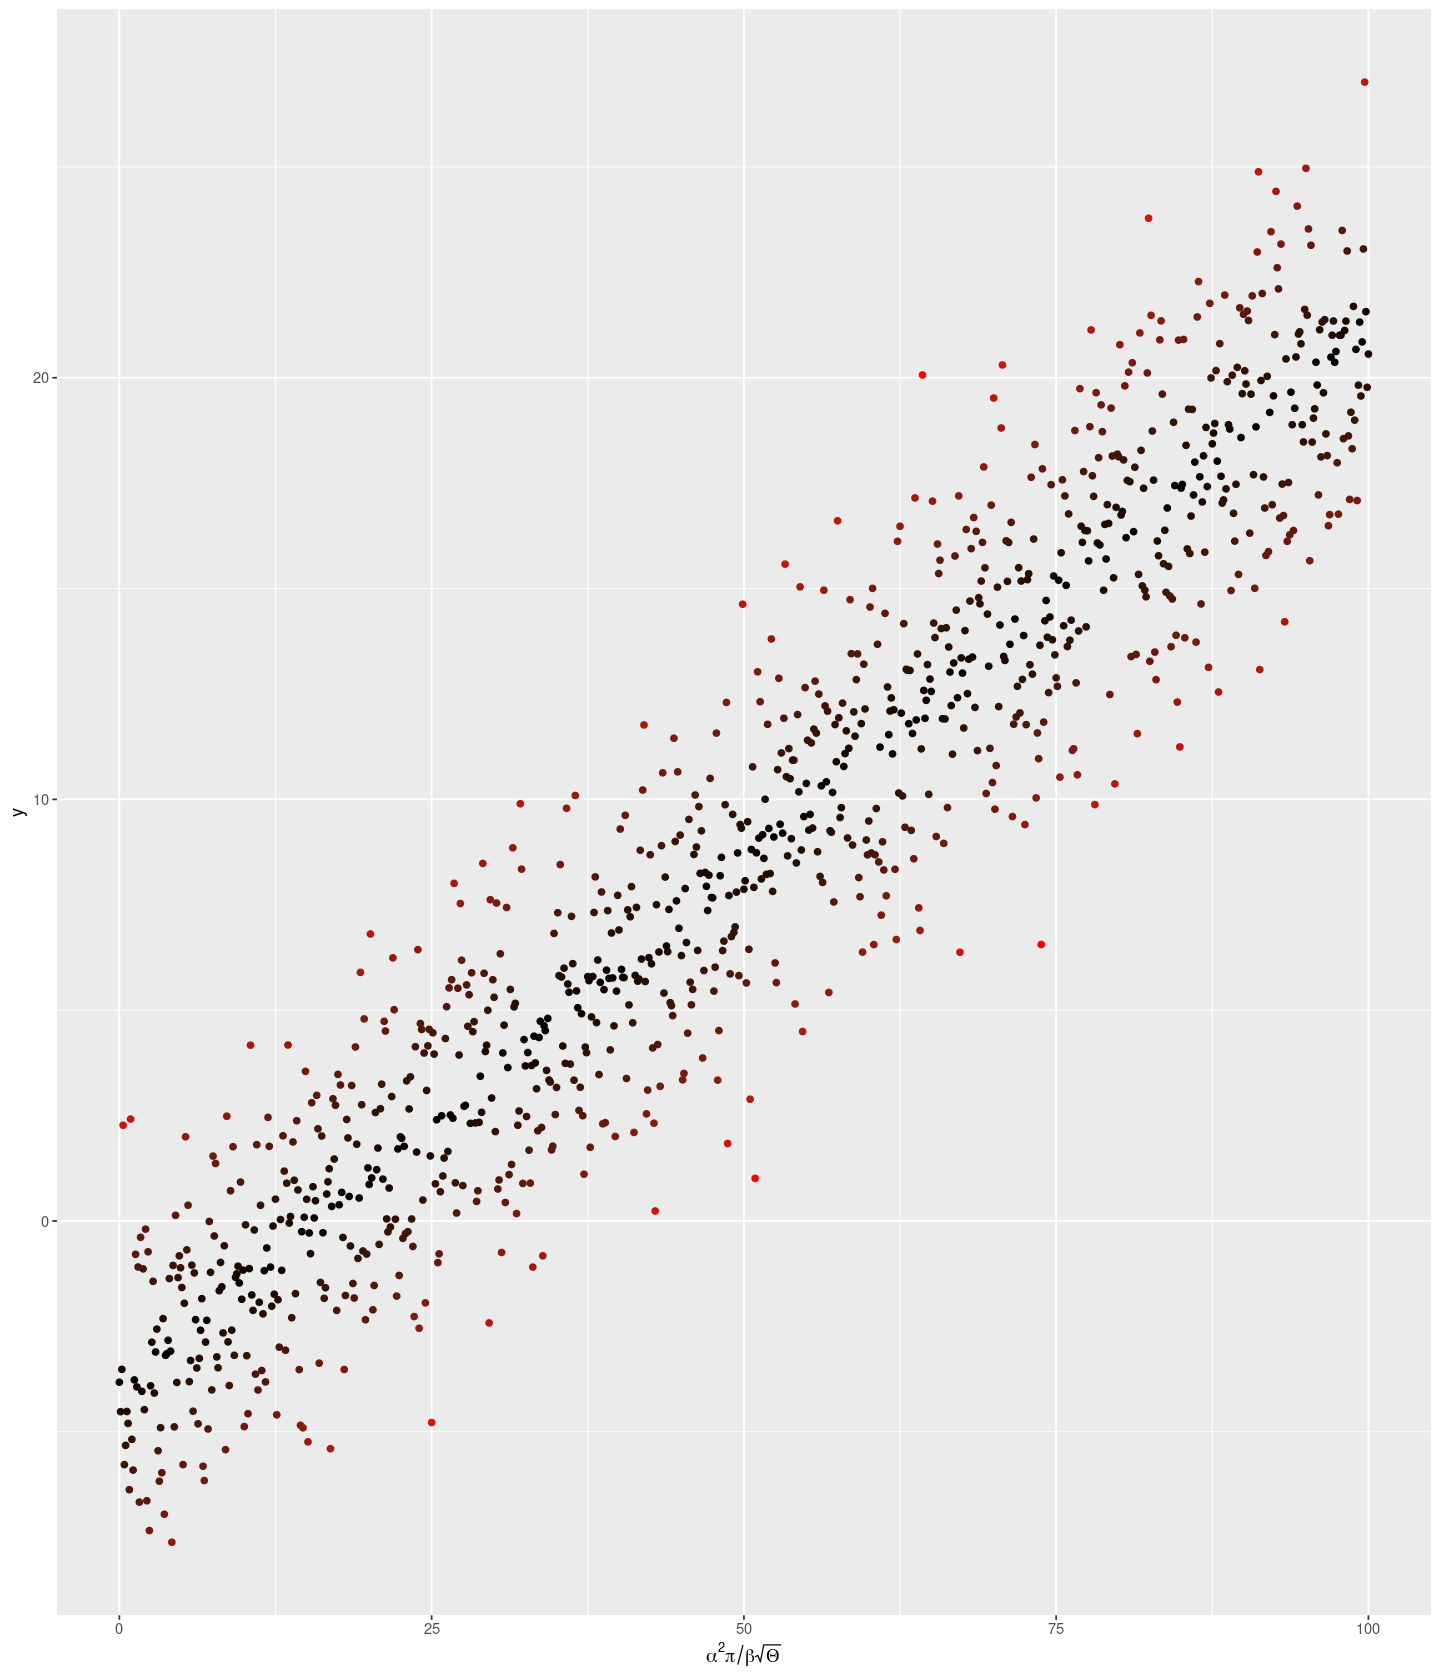

In [47]:
# plot the data
p <-  ggplot(my_data, aes(x = x, y = y,colour = abs(my_lm$residual))) +
  geom_point() +
  scale_colour_gradient(low = "black", high = "red") +
  theme(legend.position = "none") +
  scale_x_continuous(expression(alpha^2 * pi / beta * sqrt(Theta)))

p

add the regression line and throw some math on the plot

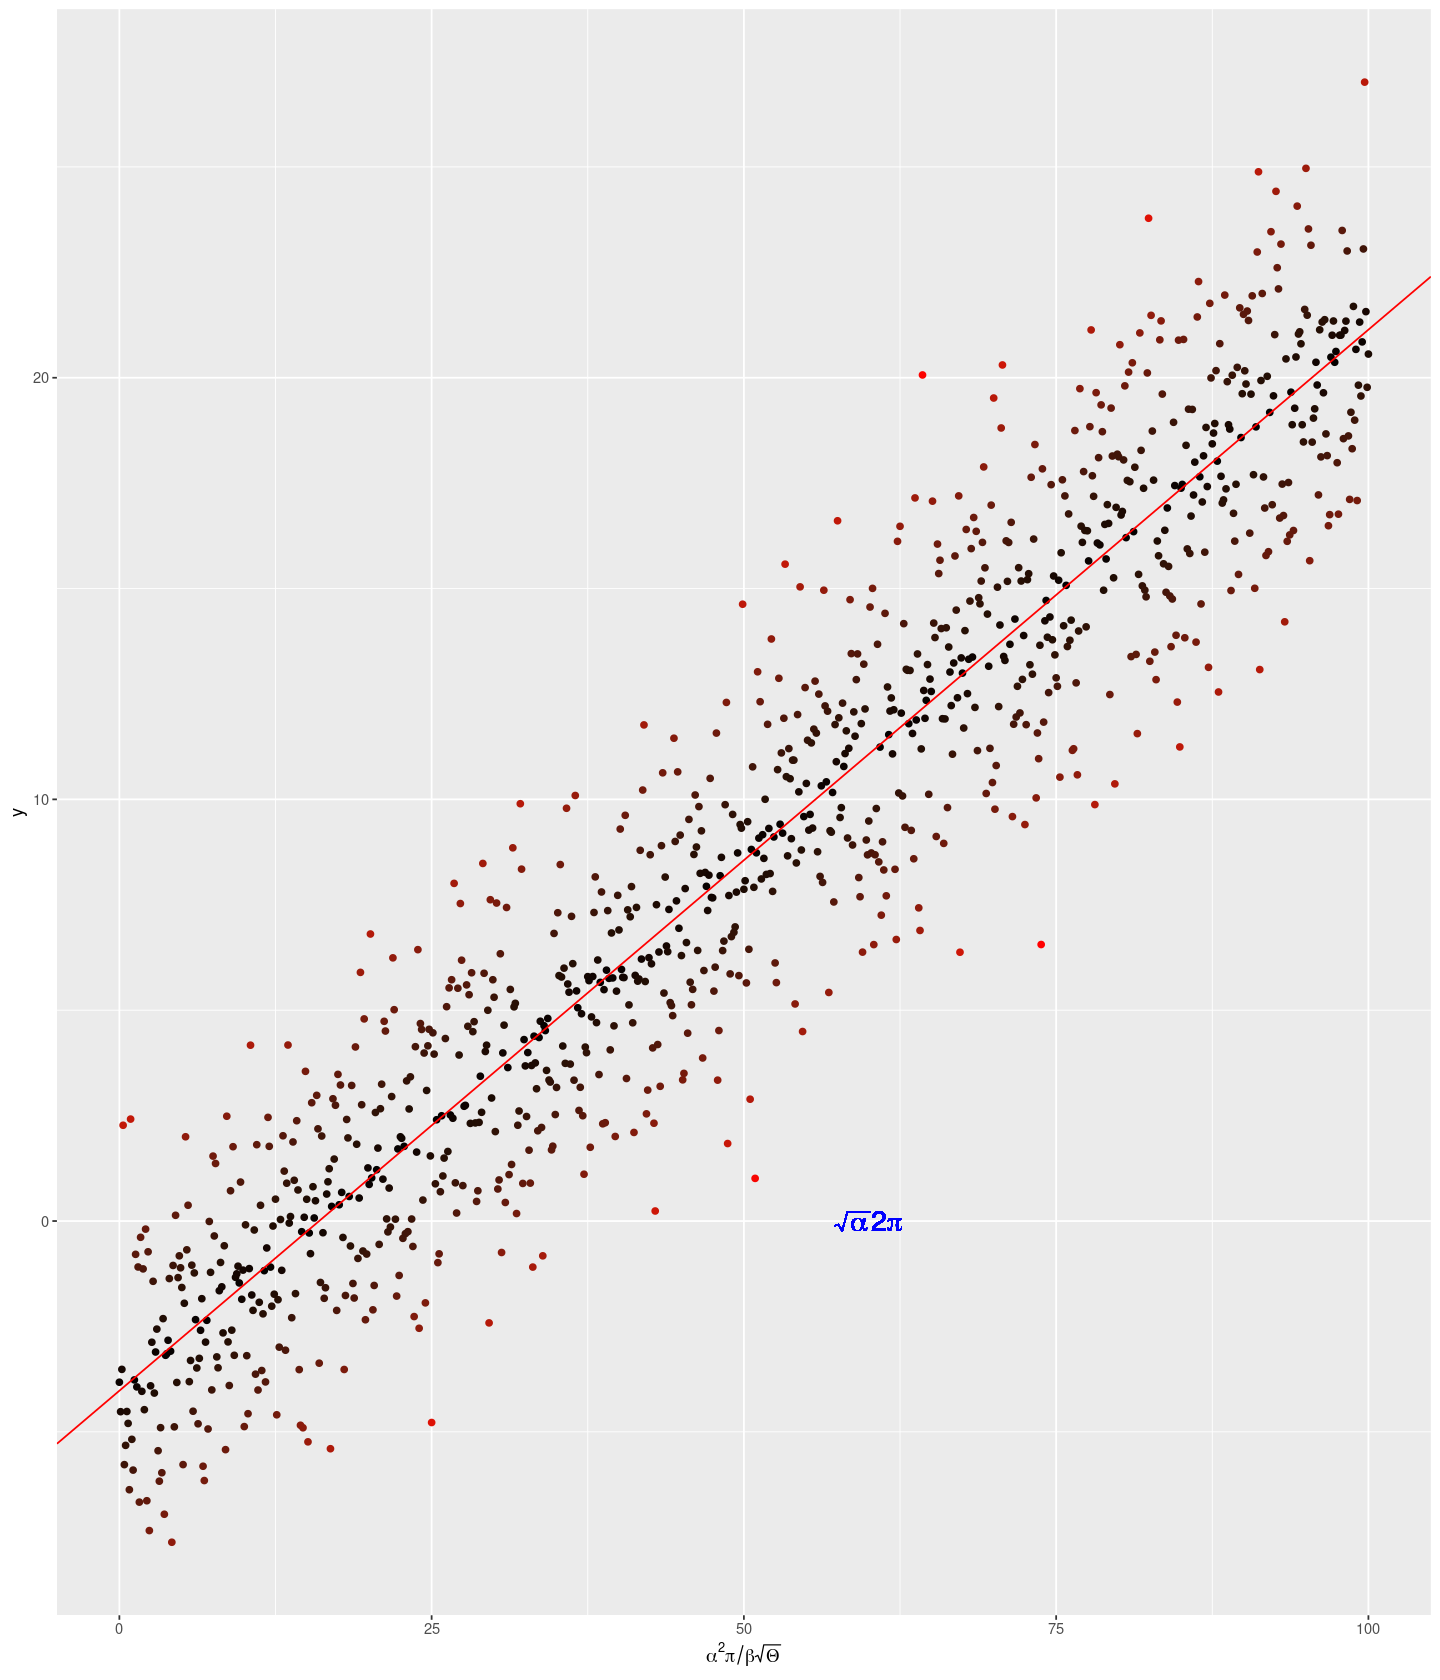

In [48]:
p <- p + geom_abline(intercept = my_lm$coefficients[1][1],
         slope = my_lm$coefficients[2][1], colour = "red") +
         geom_text(aes(x = 60, y = 0,label = "sqrt(alpha) * 2* pi"), 
         parse = TRUE, size = 6, colour = "blue")

p

Voila! You have just explored complicated data visualy!

## Readings & Resources

Check out *DataDataData!*, *Visualization* and *R*, under [*readings* on the TheMulQuaBio repository](https://github.com/mhasoba/TheMulQuaBio/tree/master/content/readings).

### Data management, reformatting and cleaning

* Brian McGill's [Ten commandments for data management](
    https://dynamicecology.wordpress.com/2016/08/22/ten-commandments-for-good-data-management)

* This paper covers similar ground (available in the readings directory): [Borer et al (2009). Some Simple Guidelines for Effective Data Management. Bulletin of the Ecological Society of America, 90(2), 205-214.](https://esajournals.onlinelibrary.wiley.com/doi/full/10.1890/0012-9623-90.2.205)

* [Dasu, T. & Johnson, T. Exploratory Data Mining and Data Cleaning. (John Wiley & Sons, Inc., 2003). doi:10.1002/0471448354](https://onlinelibrary.wiley.com/doi/book/10.1002/0471448354)

* [Wide vs. long data](http://www.theanalysisfactor.com/wide-and-long-data/)

* [Hadley Wickham's excellent article about "tidy" data](http://vita.had.co.nz/papers/tidy-data.pdf).

* [Wrangler](http://vis.stanford.edu/papers/wrangler)

* [An interactive framework for data cleaning](https://www2.eecs.berkeley.edu/Pubs/TechRpts/2000/CSD-00-1110.pdf)

### Visualization

* [Ten Simple Rules for Better Figures](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833)

* https://clauswilke.com/dataviz/

* [Rolandi et al. "A Brief Guide to Designing Effective Figures for the Scientific Paper", doi:10.1002/adma.201102518](https://onlinelibrary.wiley.com/doi/pdf/10.1002/adma.201102518?casa_token=48b0PGtaUiYAAAAA:DQ9bHugikOkHDkf4uLTYIq74negyWefZjAbexYcgYObHn0sks2Q8ulvHcTUWxteqwTb5qAa0IV71Mg)

* The classic [Tufte](https://www.edwardtufte.com/tufte/books_vdqi); Available in the Imperial College Central Library. I have also added extracts and a related book in pdf on the git repository. BTW, check out what Tufte thinks of [PowerPoint](https://www.edwardtufte.com/tufte/powerpoint).

* [Tufte in R](http://motioninsocial.com/tufte)

# Experimental design and Data exploration

Introduction 
------------

In this section you will learn how to use R to explore your data and determine appropriate statistical analyses. 

Ideally, you would like to design experiments (manipulations and/or observations) that are appropriate for the question you want to answer. However, you still need to explore you data to determine what kind of statistical analyses are appropriate for your data, because: 

(a) Your experiments or observations may not go as planned (do they ever?), and 

(b) You might have somebody else's data to analyse (very common in this era of "Big Data"). 

By the time you have worked through this section, you should be able to:

* Provided sufficient information is available, be able to judge whether the sampling design used to generate a particular dataset was appropriate

* Calculate basic statistical measures on your data to determine its properties.

* Determine if your sample sizes are adequate, especially for a specific statistical test.

We are going to start off with the simplest of scenarios for statistical testing — that you want to determine whether a sample, or a pair of samples meet some expectation (hypothesis) or not.

First, some let's revisit some key concepts and terminology. 

## Some statistical parlance

The following terms are important for you to get familiar with:

* **(Statistical) Population**: A *complete set* of items that share at least one *attribute* of interest. This attribute of interest is the target of your statistical analysis. For example, if we are interested in studying the weight of year-old cod in the Oceans, the population consists of *all* year-old cod, but more specifically, the weight measurements of all the individuals of the cod population is what we want to analyse.

---
<img src="./graphics/Cod.jpg" width="500px">

<small> <center> 
(Source: [Wikipedia](https://en.wikipedia.org/wiki/Collapse_of_the_Atlantic_northwest_cod_fishery))
    Collapse of Atlantic cod stocks off the East Coast of Newfoundland in 1992.
</center></small>

* **(Statistical) Distribution**: A mathematical description (expressed as a mathematical equation) of the properties of a population of interest. Theoreticians have come up with a bunch of distributions (e.g., Gaussian or Normal, Poisson, Binomial, etc.) that are appropriate for different kinds of data. Figuring out which distribution best describes a population of interest is one of the first steps in a statistical analysis. The primary goal of experimental design is to collect and measure sufficient individuals of a population to adequately characterize the statistical properties of an attribute (e.g., body weight of yearling cod) of interest. That is, the *statistical distribution* that best characterizes the attribute. 


* **(Data or Population) Sample**: A data *sample* is a set of measurements of the attribute of interest collected from a  (statistical) *population* (all the individuals of interest) by a defined procedure (*sampling methodology*). In the cod example above, this could be the weight of every individual of a *subset* (the *sample*) of the year-old cod population. This could be from a particular location, such as the Atlantic ocean.


* **(Statistical) Parameter** :   A measure of some attribute of the (theoretical) *statistical distribution* that is supposed to represent your population. An example would be the average weight of *all* yearling cod, which presumably follow some sort of distribution. In practice, this is not measurable because the population is much too large or incompletely inaccessible/invisible — imagine measuring the weight of every year-old cod individual in the Atlantic ocean!


* **Statistic**(singular):  An *estimate* of a statistical parameter of the population of interest, obtained by calculating the measure for a *sample*. An example would be the average or mean weight of individuals in a sample of one-year old cod in the Atlantic Ocean. This is also known as a *descriptive statistic*. Therefore, a *Statistic* is to a *Statistical Parameter* what a  *Sample* is to the (Statistical) *Population*. For example, the average of a sample of cod weights is a statistic that  *estimates* the "real" average of the weights of the entire one-year Cod population (which is its statistical parameter). This real average is also the mean value of the theoretical distribution (e.g., Gaussian) that the population is expected to follow. 


* **Hypothesis**: An informed  *postulate* about an attribute of your population of interest. For example, you may hypothesize that the one-year old cod population's mean weight has declined over the last two decades because of preferential fishing of larger individuals. You will typically confront your main hypothesis with a *Null Hypothesis*, to minimize the risk of making a significant *Type I error*. This is the probability of wrongly accepting an *alternative (or main) hypothesis* even is not really true, and rejecting the null hypothesis (e.g., the yearling cods have in reality not declined in weight, but you wrongly infer that they have). This is a big NO NO from a scientific and philosophical standpoint. The rate or probability of the Type I error is denoted by the Greek letter $\alpha$, and equals the *significance level* of a statistical test. Wrongly rejecting a true alternative (main) hypothesis is also  a *Type II* error



## Descriptive Statistics

The key statistical measures that describe a sample (or a population) are:

* [**Mean**  (or average, or more precisely, the arithmetic mean)](https://en.wikipedia.org/wiki/Arithmetic_mean):  This is a measure of the [*central tendency*](https://en.wikipedia.org/wiki/Central_tendency) of the sample and population (what values most of the data tend to have). Given a sample $x_1,x_2,\ldots,x_n$ of size $n$, the mean is typically denoted by a $\bar{x}$:

$$\bar{x} =  \frac{x_{1} + x_{2} + \dots +x_{n}}{n} = \bar{x} = \frac{\sum_{i=1}^n x_i}{n}$$

That is, it is the sum of all the values in a sample divided by the number, $n$, of items in the sample.

* [**Standard deviation**](https://en.wikipedia.org/wiki/Standard_deviation): A measure of spread of the population around the mean. This is typically denoted by $s$,and is calculated as:

$$s = \sqrt{\frac{(\bar{x} - x_{1})^{2} + (\bar{x} - x_{2})^2 + \dots + (\bar{x} - x_{n})^{2}}{n-1}} =  \sqrt{\frac{\sum_{i=1}^n (\bar{x} - x_{i})^2}{n-1}}$$

That is, it is the square root of the sum of squares ("SS") of the differences between each item in the sample and the mean, divided by the *degrees of freedom, "df"* remaining in the data set ($n-1$). df is the sample size, $n$, minus the number of statistical parameters estimated from the data set. This is to reduce the  *bias* in your *estimate* of the statistic, as you are calculating it from the sample, and not the whole theoretical population. 

Thus, the formula for $s$ above has $n-1$ in its denominator because, to work out the standard deviation, you must have already estimated the mean ($\bar{x}$) from the same data set. This removes 1 degree of freedom. Also, note that the sample variance, $s^2$ is the square of standard deviation. Or, in other words, the standard deviation is the square-root of the variance!

* [**Median**](https://en.wikipedia.org/wiki/Median): The above two statistics (mean and sd) are particularly meaningful when the sample and population have a symmetric distribution (e.g., normal or gaussian). When the distribution is not symmetric (that is, it is [*skewed*](https://en.wikipedia.org/wiki/Skewness)), the *median*  is a better measure of central tendency. This is the middle value in the ordered set of data. That is, exactly 50% of the data lie below and 50% lie above the median.

* Other descriptive statistics you should keep in mind is the [range](https://en.wikipedia.org/wiki/Range_(statistics)) (difference between the largest and smallest values), and the [quartiles](https://en.wikipedia.org/wiki/Quartile) (values lying in the data divided into the intervals $[{1\over4}, {1\over 2},{3\over 4}, 1]$ or at 1% intervals (percentiles). Box-plots, which you have seen, represent a number of these statistics in one figure, as you will soon learn in practice below.

## Descriptive statistics in R

Here are the R commands for the key descriptive statistics:   

|Command | Functionality|
|:- |:-|
| `mean(x)`| Compute mean (of a vector or matrix)|
| `sd(x)` |              Standard deviation|
| `var(x)` |             Variance|
| `median(x)` |          Median|
|  `quantile(x,0.05)` |   Compute the 0.05 quantile|
|  `range(x)`|           Range of the data|
| ` min(x)`|             Minimum|
|  `max(x)`|             Maximum|
|  `sum(x)`|             Sum all elements|


## Data types and (statistical) distributions

You will typically encounter or sample the following main types of data:

* **Continuous numeric**: Data that can take decimal values (real numbers) such as human height or weight. These may be unbounded (any value between negative infinity to positive infinity), or bounded (e.g., between or zero and some upper positive number) like human weight. This is the `numeric` or `real` data type in R. 

* **Discrete numeric**: Integer (whole) numbers such as counts of individuals in a population, e.g., The number of bacteria in a ml of pond water. This is the `int` data type in R.

* **Percentage (proportion)**: A particular kind of numeric data that is strictly bounded between 0 and 100. The fact that you can never get samples of percentages that exceed these bounds makes such data tricky to analyse. This also falls under the `numeric` or `real` data type in R. 

* **Categorical**: Consisting of a fixed number of discrete categories. These are typically stored as a *factor* in R, with the categories stored as *levels* in character (string) data type format. For example, the factor "Type.of.feeding.interaction" from the predator-prey dataset you have [used previously](08-Data_R.ipynb#Basic-plotting-commands) had five levels: "insectivorous", "piscivorous", "planktivorous", "predacious", and "predacious/piscivorous".

* **Binary (presence/absence)**: A special type of categorical data are binary, where only two categories/states/values are possible: (1, 0) (or "present", "absent") (e.g., a disease symptom). These may be stored as integer, character, or boolean (`TRUE`/`FALSE`) in R.

While designing experiments or exploring data, you need to keep in mind that each data type will often be best-represented by a particular *statistical distribution*. For example, continuous numeric data are *often* normally distributed. On the other hand, count data are likely to be distributed according to the Poisson distribution.

If you are lucky, you will mostly have to deal with data that are continuous or discrete numeric, which are the most straightforward to analyse using Linear models (more on that in subsequent sections). However, some of the most interesting and important problems in biology involve proportion (percentage), categorical and binary data (e.g., Presence or absence of a disease symptom).

For example, think about what type of data, and what type of distribution, a sample of the following is likely to be:

* Wavelength of light
* Temperature
* Egg clutch size
* Rate of a reaction
* Eye-colour
* Score in Scrabble
* Undergraduate Degree class
* Ground-cover of grass in a quadrat
* Winning side in chess

## Sampling from distributions in R

You can generate samples form many statistical distributions in R. This is a handy thing to know because this allows you to simulate a sampling "experiment" . In particular, the following R commands are important:

|Command | Functionality|
|:- |:- |
|`rnorm(n, m=0, sd=1)`|      Draw `n` [normally-distributed](https://en.wikipedia.org/wiki/Normal_distribution) random numbers with mean = 0 and sd = 1|
|`dnorm(x, m=0, sd=1)`|       Density function of the normal distribution, which can be used to calculate the probability of a particular event or a set of independent events|
| `qnorm(x, m=0, sd=1)`|      Cumulative density function|
|`runif(n, min=0, max=2)`|   Twenty random numbers from uniform distribution with bounds $[0, 2]$|
|`rpois(n, lambda=10)`|      Twenty random numbers from the Poisson($\lambda$) distribution|

Let's try some of these. Generate a random sample of 10:

In [2]:
MySample <- rnorm(10, m=0, sd=1)

In [3]:
MySample

[1]  0.36268662  0.30684013 -0.07200007 -0.09732762  0.79645239  0.75963031
 [7]  0.05864227 -0.48408253 -0.48369536 -0.21817255

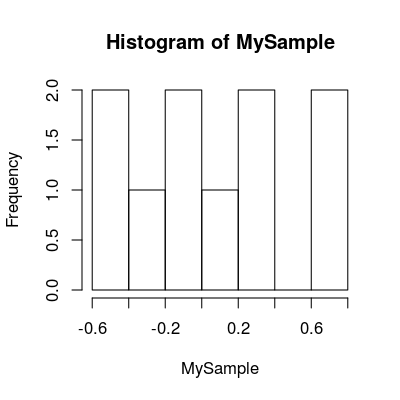

In [4]:
hist(MySample)

Probability of getting a value of 1 or -1 from a normally distributed random number with mean = 0 and sd = 1: 

In [5]:
dnorm(1, m=0, sd=1)

[1] 0.2419707

In [6]:
dnorm(-1, m=0, sd=1)

[1] 0.2419707

Probability of getting large values given the same distribution:

In [7]:
dnorm(10, m=0, sd=1)

[1] 7.694599e-23

Very small!

In [8]:
dnorm(100, m=0, sd=1)

[1] 0

Zero!

Look up the documentation and examples for the other commands/functions listed above and many others that are available. 

## Two basic rules of experimental design and sampling

In general, while designing experiments, and sampling from a  *population*, there are two key (and simple) rules:

1.  **The more you sample, the more your sample's distribution will look like the population distribution** (obviously!)

2.  **The more you sample, the closer will your sample statistic be to the population's statistical parameter** (the central limit theorem; when the statistical parameter is the mean, this is the "law of large numbers")

Let's test rule 1 using R. We will perform a "experiment" by generating random samples of increasing size from the normal distribution: 

In [9]:
MySample5 <- rnorm(5, m=0, sd=1) # Draw 5 normal random nos w/ mean 0 and s.d. 1:
MySample10 <- rnorm(10, m=0, sd=1) 
MySample20 <- rnorm(20, m=0, sd=1) 
MySample40 <- rnorm(40, m=0, sd=1)
MySample80 <- rnorm(80, m=0, sd=1)
MySample160 <- rnorm(160, m=0, sd=1)

Now let's visualize these "samples":

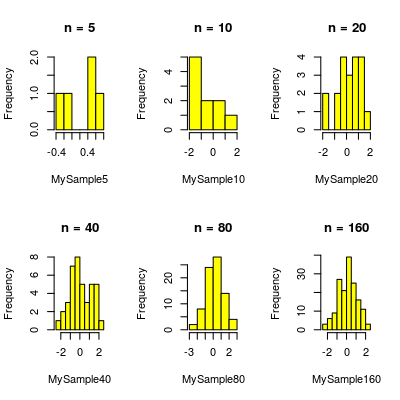

In [10]:
par(mfcol = c(2,3)) #initialize multi-paneled plot
par(mfg = c(1,1)); hist(MySample5, col = rgb(1,1,0), main = 'n = 5') 
par(mfg = c(1,2)); hist(MySample10, col = rgb(1,1,0), main = 'n = 10') 
par(mfg = c(1,3)); hist(MySample20, col = rgb(1,1,0), main = 'n = 20') 
par(mfg = c(2,1)); hist(MySample40, col = rgb(1,1,0), main = 'n = 40') 
par(mfg = c(2,2)); hist(MySample80, col = rgb(1,1,0), main = 'n = 80') 
par(mfg = c(2,3)); hist(MySample160, col = rgb(1,1,0), main = 'n = 160') 

Rule 2 above states that if I was to repeat even $n = 5$ sufficient number of times, you would get a good *estimate* of mean (= 0) and standard deviation (= 1) of the normal distribution we sampled from. Try doing it. You can take increasing numbers of samples of 5, take their mean, and check how close to get to 0 as you increase your number of samples of 5.  

If you give due regard to the two rules of experimental design above, and consider the type of distribution your population of interest follows, you will have taken some basic, important steps towards designing an effective study. 

A more rigorous method for designing experiments is to perform a [power analysis](https://en.wikipedia.org/wiki/Power_(statistics)). Power analyses allow you to estimate the minimum sample size required to be able to detect (while minimizing Type I error) an effect of a given size. Covering this is outside the scope of the current course, but you might want to have a look at [this resource](https://www.statmethods.net/stats/power.html).

OK, so you have performed your experiments or field sampling, or some data have fallen into your lap. Let's move on to data exploration.

## Data exploration

### Some general tips

Statistics is a bit of an art.

That is why *a priori* visualization is important, and directly cutting to the (statistical) chase can often leave one floundering with confusing coefficient estimates and model fits (or over-fits) and overall uncertainty about whether you have picked the right statistical test. 

* So no matter what, always first look at the distribution of the response (the "raw data"). If you see multi-modality (multiple peaks), it might mean that some process or effect is generating it. So, in the dragonfly-damselfly example below, a preliminary visualization of the densities of genome size immediately tell you that there are actually two populations (e.g., two levels of  effects, or a process that generates the two populations with different central tendencies $\mu_A$ and $\mu_B$). 

* If it is a regression-type problem, look at the marginal distributions (distributions of the x and y variables) - similar insights can be gained.

* Also, one can look at the distributions within the effects to look for consistency of both shape (sample of the underlying population's distribution type) and spread (sample of the underlying population's variance). 
    * If there is consistency in both, the battle is pretty much won, because normal or not, there are statistical methods (GLMs, for example) that can be used. 
    * If there is consistency in distribution type but not in variance, half the battle is won. Unequal variances very often tend to be a problem with unbalanced sampling (across effects/treatments), so you can throw in mixed effects (so, GLMMs) which allows you to use empirical information (the data) across effects to help correct for it. 
    * And also, very often, tests are robust to unequal variances (you would need to find a statistical paper, or do your own simulations to support this - so very often better to stick with mixed effects). 
    * If there is consistency in variance but not shape, or inconsistency in both, then you have a harder problem, and may have to resort to transforming some data and not others (not ideal, to be avoided).

### A case study

As a case study, we will use data from a paper looking at the relationship between genome size and body size across species of dragonflies and damselflies ([Odonata](http://en.wikipedia.org/wiki/Odonata)):

> Ardila-Garcia, AM & Gregory, TR (2009) 'An exploration of genome size diversity in dragonflies and damselflies (Insecta: Odonata)' Journal of Zoology, 278, 163 - 173

You will work with the script file `ExpDesign.R`, which performs exploratory analyses on the data in `GenomeSize.csv`. Let's go through the code block by block.

$\star$ Get the script `ExpDesign.R` from the TheMulQuaBio repository and put it in your own `Code` directory.

$\star$ Also get `GenomeSize.csv`

$\star$ Open the script `ExpDesign.R` in RStudio (or some other text editor).

Use the shift and arrow keys to select the code in block (2), including the comments.

In [11]:
genome <- read.csv('../data/GenomeSize.csv')

Note the relative path `../`, which will work assuming that you are working from your `code` directory (that is, you have set your working directory (using `setwd()`) to `code`).

This first line (block (1)) reads in the data, as you have learned previously.

$\star$ Now run the code in block (2) line by line.

In [12]:
head(genome) # this won't look so nice on your computer!

Suborder,Family,Species,GenomeSize,GenomeSE,GenomeN,BodyWeight,TotalLength,HeadLength,ThoraxLength,AdbdomenLength,ForewingLength,HindwingLength,ForewingArea,HindwingArea,MorphologyN
Anisoptera,Aeshnidae,Aeshna canadensis,2.20,NA,1,0.159,67.58,6.83,11.81,48.94,45.47,45.40,369.57,483.61,2
Anisoptera,Aeshnidae,Aeshna constricta,1.76,0.06,4,0.228,71.97,6.84,10.72,54.41,46.00,45.48,411.15,517.38,3
Anisoptera,Aeshnidae,Aeshna eremita,1.85,NA,1,0.312,78.80,6.27,16.19,56.33,51.24,49.47,460.72,574.33,1
Anisoptera,Aeshnidae,Aeshna tuberculifera,1.78,0.10,2,0.218,72.44,6.62,12.53,53.29,49.84,48.82,468.74,591.42,2
Anisoptera,Aeshnidae,Aeshna umbrosa,2.00,NA,1,0.207,73.05,4.92,11.11,57.03,46.51,45.97,382.48,481.44,1
Anisoptera,Aeshnidae,Aeshna verticalis,1.59,NA,1,0.220,66.25,6.48,11.64,48.13,45.91,44.91,400.40,486.97,1


In [13]:
str(genome) # Check what the data columns contain

'data.frame':	100 obs. of  16 variables:
 $ Suborder      : Factor w/ 2 levels "Anisoptera","Zygoptera": 1 1 1 1 1 1 1 1 1 1 ...
 $ Family        : Factor w/ 9 levels "Aeshnidae","Calopterygidae",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Species       : Factor w/ 100 levels "Aeshna canadensis",..: 1 2 3 4 5 6 8 17 46 53 ...
 $ GenomeSize    : num  2.2 1.76 1.85 1.78 2 1.59 1.44 1.16 1.44 1.2 ...
 $ GenomeSE      : num  NA 0.06 NA 0.1 NA NA NA NA NA NA ...
 $ GenomeN       : int  1 4 1 2 1 1 1 1 1 1 ...
 $ BodyWeight    : num  0.159 0.228 0.312 0.218 0.207 0.22 0.344 0.128 0.392 0.029 ...
 $ TotalLength   : num  67.6 72 78.8 72.4 73 ...
 $ HeadLength    : num  6.83 6.84 6.27 6.62 4.92 6.48 7.53 5.74 8.05 5.28 ...
 $ ThoraxLength  : num  11.8 10.7 16.2 12.5 11.1 ...
 $ AdbdomenLength: num  48.9 54.4 56.3 53.3 57 ...
 $ ForewingLength: num  45.5 46 51.2 49.8 46.5 ...
 $ HindwingLength: num  45.4 45.5 49.5 48.8 46 ...
 $ ForewingArea  : num  370 411 461 469 382 ...
 $ HindwingArea  : num  484 517 574

Have a good look at the data. There are three factors (categorical variables): Suborder, splitting the species into dragonflies (Anisoptera) and damselflies (Zygoptera); Family, splitting the species further into 9 taxonomic families; and Species, giving the latin
binomial for each species in the table. The remaining columns are measurements of genome size (in picograms) and measurements of body size and morphology (in grams, mm and mm$^2$). There are two columns ending with an N that show the sample size from which the observations for each species are taken and a column ending SE showing standard errors.

One thing you should see in the output from `head` or `str` is that there are some observations marked as `NA` – this is the way R shows *missing data*. It is important to check how much missing data there are in a dataset, so we'll use another function that includes this information. Many R functions refuse to use variables containing missing data — this is just R being careful and you can add `na.rm=TRUE` into most functions to avoid this problem.

$\star$ Run the `summary` line from the script window (block 3).

In [14]:
summary(genome)

       Suborder             Family                   Species     GenomeSize    
 Anisoptera:62   Coenagrionidae:27   Aeshna canadensis   : 1   Min.   :0.4100  
 Zygoptera :38   Libellulidae  :25   Aeshna constricta   : 1   1st Qu.:0.7375  
                 Gomphidae     :14   Aeshna eremita      : 1   Median :0.9400  
                 Aeshnidae     :11   Aeshna tuberculifera: 1   Mean   :1.0143  
                 Corduliidae   : 9   Aeshna umbrosa      : 1   3rd Qu.:1.1800  
                 Lestidae      : 7   Aeshna verticalis   : 1   Max.   :2.3600  
                 (Other)       : 7   (Other)             :94                   
    GenomeSE          GenomeN        BodyWeight       TotalLength   
 Min.   :0.00600   Min.   : 1.00   Min.   :0.00200   Min.   :22.82  
 1st Qu.:0.02000   1st Qu.: 1.00   1st Qu.:0.01200   1st Qu.:32.35  
 Median :0.03000   Median : 1.00   Median :0.04000   Median :41.41  
 Mean   :0.03398   Mean   : 2.36   Mean   :0.07486   Mean   :43.76  
 3rd Qu.:0.0400

Note that each column gets a separate summary! Look carefully at the output. There is a column for each variable: for factors, it provides a short table of the number of observations in each level and for continuous variables, it provides some simple summary statistics about the distribution (range, quartiles, mean and median), and the number of missing values.

## Visualise distributions of the variables

The `summary` function shows us the basic distribution (range, quartiles, mean and median) of a continuous variable, but this is easier to interpret if we visualise it. We'll look at two ways:

* **Histogram**: In the simplest form, this shows the number of observations of the variable falling into a set of bins spanning the range of the variable. The option `breaks` allows you to change the number of bins.

* **Density plot**:   Rather than showing blocks of counts, the density plot shows a continuous smooth line. This is a *smoothed* estimate of the how frequently data is observed across the range of values and the *bandwidth* (`bw=0.1`) controls the degree of the smoothing.

$\star$ Go to block (4) of the script and run each line separately, looking at the output.


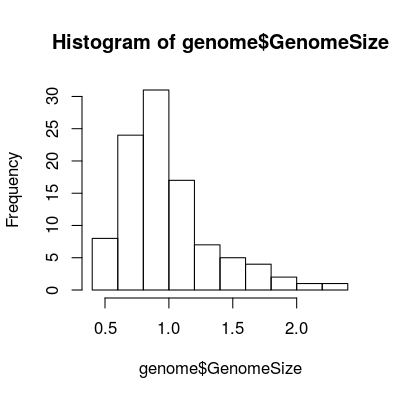

In [15]:
hist(genome$GenomeSize, breaks=10)

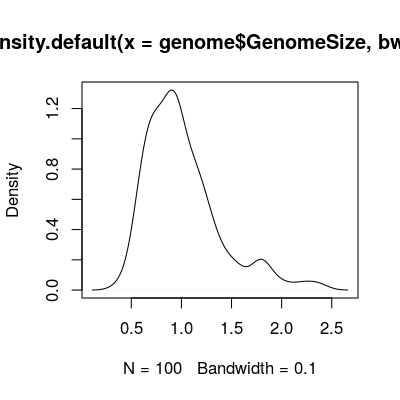

In [16]:
plot(density(genome$GenomeSize, bw=0.1))

In your code editor, change the values of `breaks` and `bw` (gfor example `breaks=5` and
`bw=0.05`), and re-run these lines to see how this affects the graph. Basically, with both types of graph you can look at the data too coarsely or too finely.

The graphs you've just created look at genome size. Add a copy of those two lines of code in the script and change them to look at the variable `TotalLength`. You will need to alter the `density` function to ignore missing values (`na.rm=TRUE`) and to play around with the bandwidth. You should get something like this:

---

<img src="./graphics/histTL1.png" width="300px">

<img src="./graphics/histTL2.png" width="300px">

---

## Take a quick look at effects of certain factors

R has a special way of describing a model that defines the response variable and the explanatory variables ("factors"). This is called a 'formula' and is used to define linear models (more on these in a later sections). The same structure is used in many plotting functions and will put the response variable on the $y$ axis and the explanatory
variable on the $x$ axis. The structure is "response variable ~ explanatory variables". We will look at multiple explanatory variables in a later section but an example with one explantory variable (factor) is:

`Genome Size ~ Suborder`

This formula tells R to model genome size 'as a function of' (`~`) the suborders of Odonata. When using this syntax in a `plot` function, the result will be to plot genome size as a function of the suborders.

## Compare distribution of the variable across levels of a factor

Although looking at the distribution of variables is a good first step, we often want to compare distributions. In this case, we might want to know how genome size varies between dragonflies and damselflies. The first way we will look at is using boxplots — these show the median and the 25% and 75% quantiles as a box, with whiskers extending to the minimum and maximum. More extreme outliers are plotted independently as points. The `plot` function in R automatically generates a boxplot when the explanatory variable is a factor.

$\star$ Go to block 5 of the script and run the first line, looking at genome size between the two suborders:

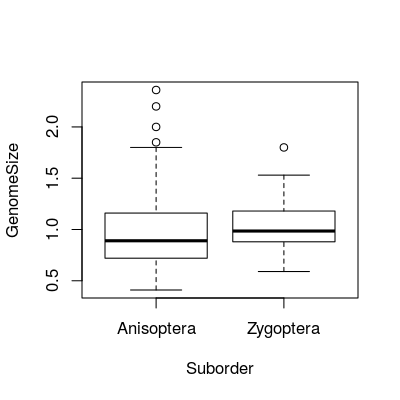

In [19]:
plot(GenomeSize ~ Suborder, data=genome)

Duplicate and alter this line to look at the same plot for total length. You should get a plot like this:

---

<img src="./graphics/bxpTL.png" width="300px">
 

---

Although histograms are great for one variable, plotting two histograms on top of one another rarely works well because the overlapping bars are hard to interpret (recall the predator-prey body size example). Density plots don't have this problem, but it takes a bit more code to create the plot.

$\star$ Block 6 of the script uses the `subset` function to create two new data frames separating the data for dragonflies and damselflies. Run the first two lines of this block: 

In [21]:
Anisoptera <- subset(genome, Suborder=='Anisoptera') #The dragonflies
Zygoptera <- subset(genome, Suborder=='Zygoptera') #The damselflies

Remember that the arrow symbol (`<-`) is used to save the output of a function into a new
object in R — if you use `ls()` in the console, you will see the two new data frames.

In the console, use `str` and `summary` to explore these two new dataframes. For example:

In [22]:
head(Anisoptera)

Suborder,Family,Species,GenomeSize,GenomeSE,GenomeN,BodyWeight,TotalLength,HeadLength,ThoraxLength,AdbdomenLength,ForewingLength,HindwingLength,ForewingArea,HindwingArea,MorphologyN
Anisoptera,Aeshnidae,Aeshna canadensis,2.20,NA,1,0.159,67.58,6.83,11.81,48.94,45.47,45.40,369.57,483.61,2
Anisoptera,Aeshnidae,Aeshna constricta,1.76,0.06,4,0.228,71.97,6.84,10.72,54.41,46.00,45.48,411.15,517.38,3
Anisoptera,Aeshnidae,Aeshna eremita,1.85,NA,1,0.312,78.80,6.27,16.19,56.33,51.24,49.47,460.72,574.33,1
Anisoptera,Aeshnidae,Aeshna tuberculifera,1.78,0.10,2,0.218,72.44,6.62,12.53,53.29,49.84,48.82,468.74,591.42,2
Anisoptera,Aeshnidae,Aeshna umbrosa,2.00,NA,1,0.207,73.05,4.92,11.11,57.03,46.51,45.97,382.48,481.44,1
Anisoptera,Aeshnidae,Aeshna verticalis,1.59,NA,1,0.220,66.25,6.48,11.64,48.13,45.91,44.91,400.40,486.97,1


Now that we've got the data separated we can go about plotting the two curves.

$\star$ Run the next two lines of code in block 6. The first draws the plot for damselflies and the second adds a line for the dragonflies:

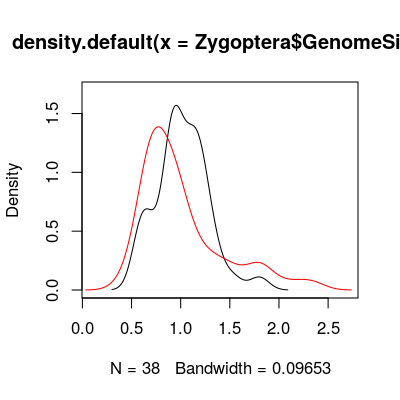

In [23]:
plot(density(Zygoptera$GenomeSize), xlim=c(0.1, 2.7), ylim=c(0,1.7))
lines(density(Anisoptera$GenomeSize), col='red')

Duplicate these last two lines of code and edit them to generate a similar plot for total body length. You will need to edit the code to change the range of the $x$ and $y$ axes (`xlim` and `ylim`) to get both curves to fit neatly on to the graph. It should look like this:

---
<img src="./graphics/densTL.png" width="300px">

---

## Explore further by scatter-plotting two variables

Once we've looked at the distribution of variables, the next thing is to look at the relationships between continuous variables using scatterplots. The `plot` function in R automatically generates a scatterplot when the explanatory variable is continuous, so we can use the same syntax and structure as for the boxplot above.

$\star$ Go to block (7) of the script and run the plot commands. The third one plots genome size as a function of body weight:

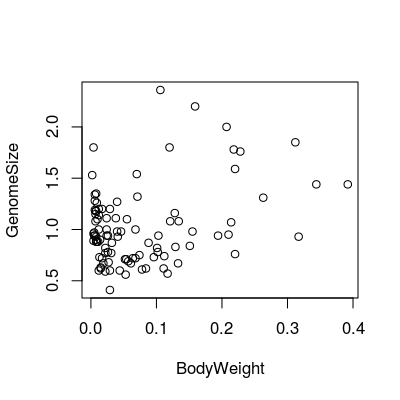

In [28]:
plot(GenomeSize ~ BodyWeight, data = genome)

The scatterplot seems to show a weak relationship between genome size and morphology. But maybe dragonflies and damselflies show different relationships, and we can't distinguish between them! To explore this possibility, we need to plot the two orders using different colours or plot characters. In the next code block, we will customize the plots to show different types of points for each suborder. It is done by using *indexing*.

$\star$ Run the first three lines of code in block 8. There are two levels of suborder and these two lines set up a colour and a plot symbol that will be used for each one.

In [25]:
str(genome$Suborder) #Confirm that there are two levels under suborders 

 Factor w/ 2 levels "Anisoptera","Zygoptera": 1 1 1 1 1 1 1 1 1 1 ...


You can see that there are two levels, with Anisoptera first and then Zygoptera. You can also see that these are stored as numeric values: 1 refers to the first level and 2 the second. We can use these as *indices* to pair the colours and plot symbols to each suborder. These are set in the `plot` function using the options `col=` and `pch=`, which stands for " `p`lot `ch`aracter".

In [26]:
myColours <- c('red', 'blue') # So choose two colours
mySymbols <- c(1,3) # And two different markers

Run the next plot command to see the resulting plot:

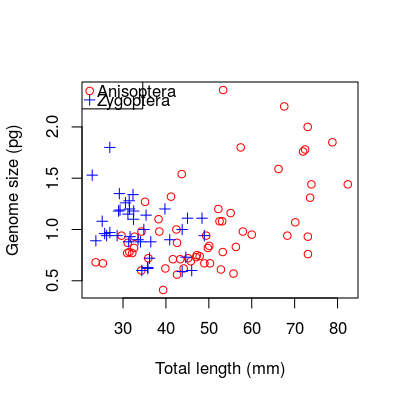

In [27]:
plot(GenomeSize ~ TotalLength , data = genome, #Now plot again
col = myColours[Suborder], pch = mySymbols[Suborder],
xlab='Total length (mm)', ylab='Genome size (pg)')

legend("topleft", legend=levels(genome$Suborder), #Add legend at top left corner
       col= myColours, pch = mySymbols, cex = 1)

Thus each point gets the appropriate colour and symbol for its group. This is the indexing: `myColours[Suborder]` and `mySymbols[Suborder]` automatically assign the two colors and two symbols to the two suborders.

There are a lot of built in colours and plot symbols in R, so the next thing to experiment with is changing these to your own versions.

$\star$ In the R commandline, type in the function `colors()`. 

You'll see a long list of options to choose from, so pick two to replace red and blue in the plot above.

The options for the plot symbols are shown below. Pick two to replace the current symbol choices.

---

<img src="./graphics/pch.png" width="400px"> 

---

Rerun the `plot` function and see what you get!


## Save your results

### Saving the exploratory graphics

The function `pdf` opens a new empty pdf file which can then be used to plot graphs. You can set the width and the height of the page size in the pdf but note that this is set in *inches*. When you have finished creating a plot, the function `dev.off` closes the pdf file and makes it readable.

$\star$ Open 'GenomeSize.pdf' in a PDF reader. It uses the original colours and
plot symbols. Close the file and then delete it from the folder.

$\star$ Now go back to the script in R and select and run all the code in block (9)

Go back to the `results` folder. The pdf file should have been recreated — open it and it should now use your choice of colours and symbols.

### Saving other results

You can also save the data and variables in R format — the original data, two subsets of the data and the two sets of colours and symbols. This will make it easy to restart where you left off. However, We can recreate the data subsets easily, so we'll just save the data and your colour sets.

$\star$ Go to the script window and run the final line in block (10)

Still in the script window, choose 'File $\triangleright$ Save' to save your changes to the script file.

Quit from R by typing `q()` at the R command prompt. You can also use ctrl+D in Unix).


## From data exploration to statistical analysis

After you have performed your data exploration, you are in a position to make an informed decision about what statistical analyses to perform. Here is a decision tree that you can use, and which includes the methods you will learn in the following sections:  

---

<img src="./graphics/yr1_2_flowchart.svg" width="900px">


# Practice Problem for Data Wrangling

## Organise (or wrangle!) the data, as you learned in the notebook. The dataset provided `wranglingdataset.csv` contains values on trait-temperature relationships. Select a focal species from this dataset. Use your species-specific subset to develop a hypothesis and explore it. Present your group's findings using descriptive statistics and visualizations.